In [1]:
import warnings 
warnings.filterwarnings('ignore') 
# Importando as bibliotecas necessárias da diagrams
from diagrams import Diagram, Cluster, Edge
from diagrams.gcp.analytics import Bigquery, Dataflow, Composer, DataFusion
from diagrams.gcp.compute import Functions
from diagrams.gcp.ml import AIPlatform, Automl
from diagrams.gcp.storage import Storage
from diagrams.gcp.database import SQL as gcp_sql
from diagrams.custom import Custom 
from diagrams.generic.blank import Blank  
from diagrams.generic.database import SQL
from diagrams.generic.storage import Storage
from diagrams.gcp.iot import IotCore


# https://googlecloudcheatsheet.withgoogle.com/


#  Overview

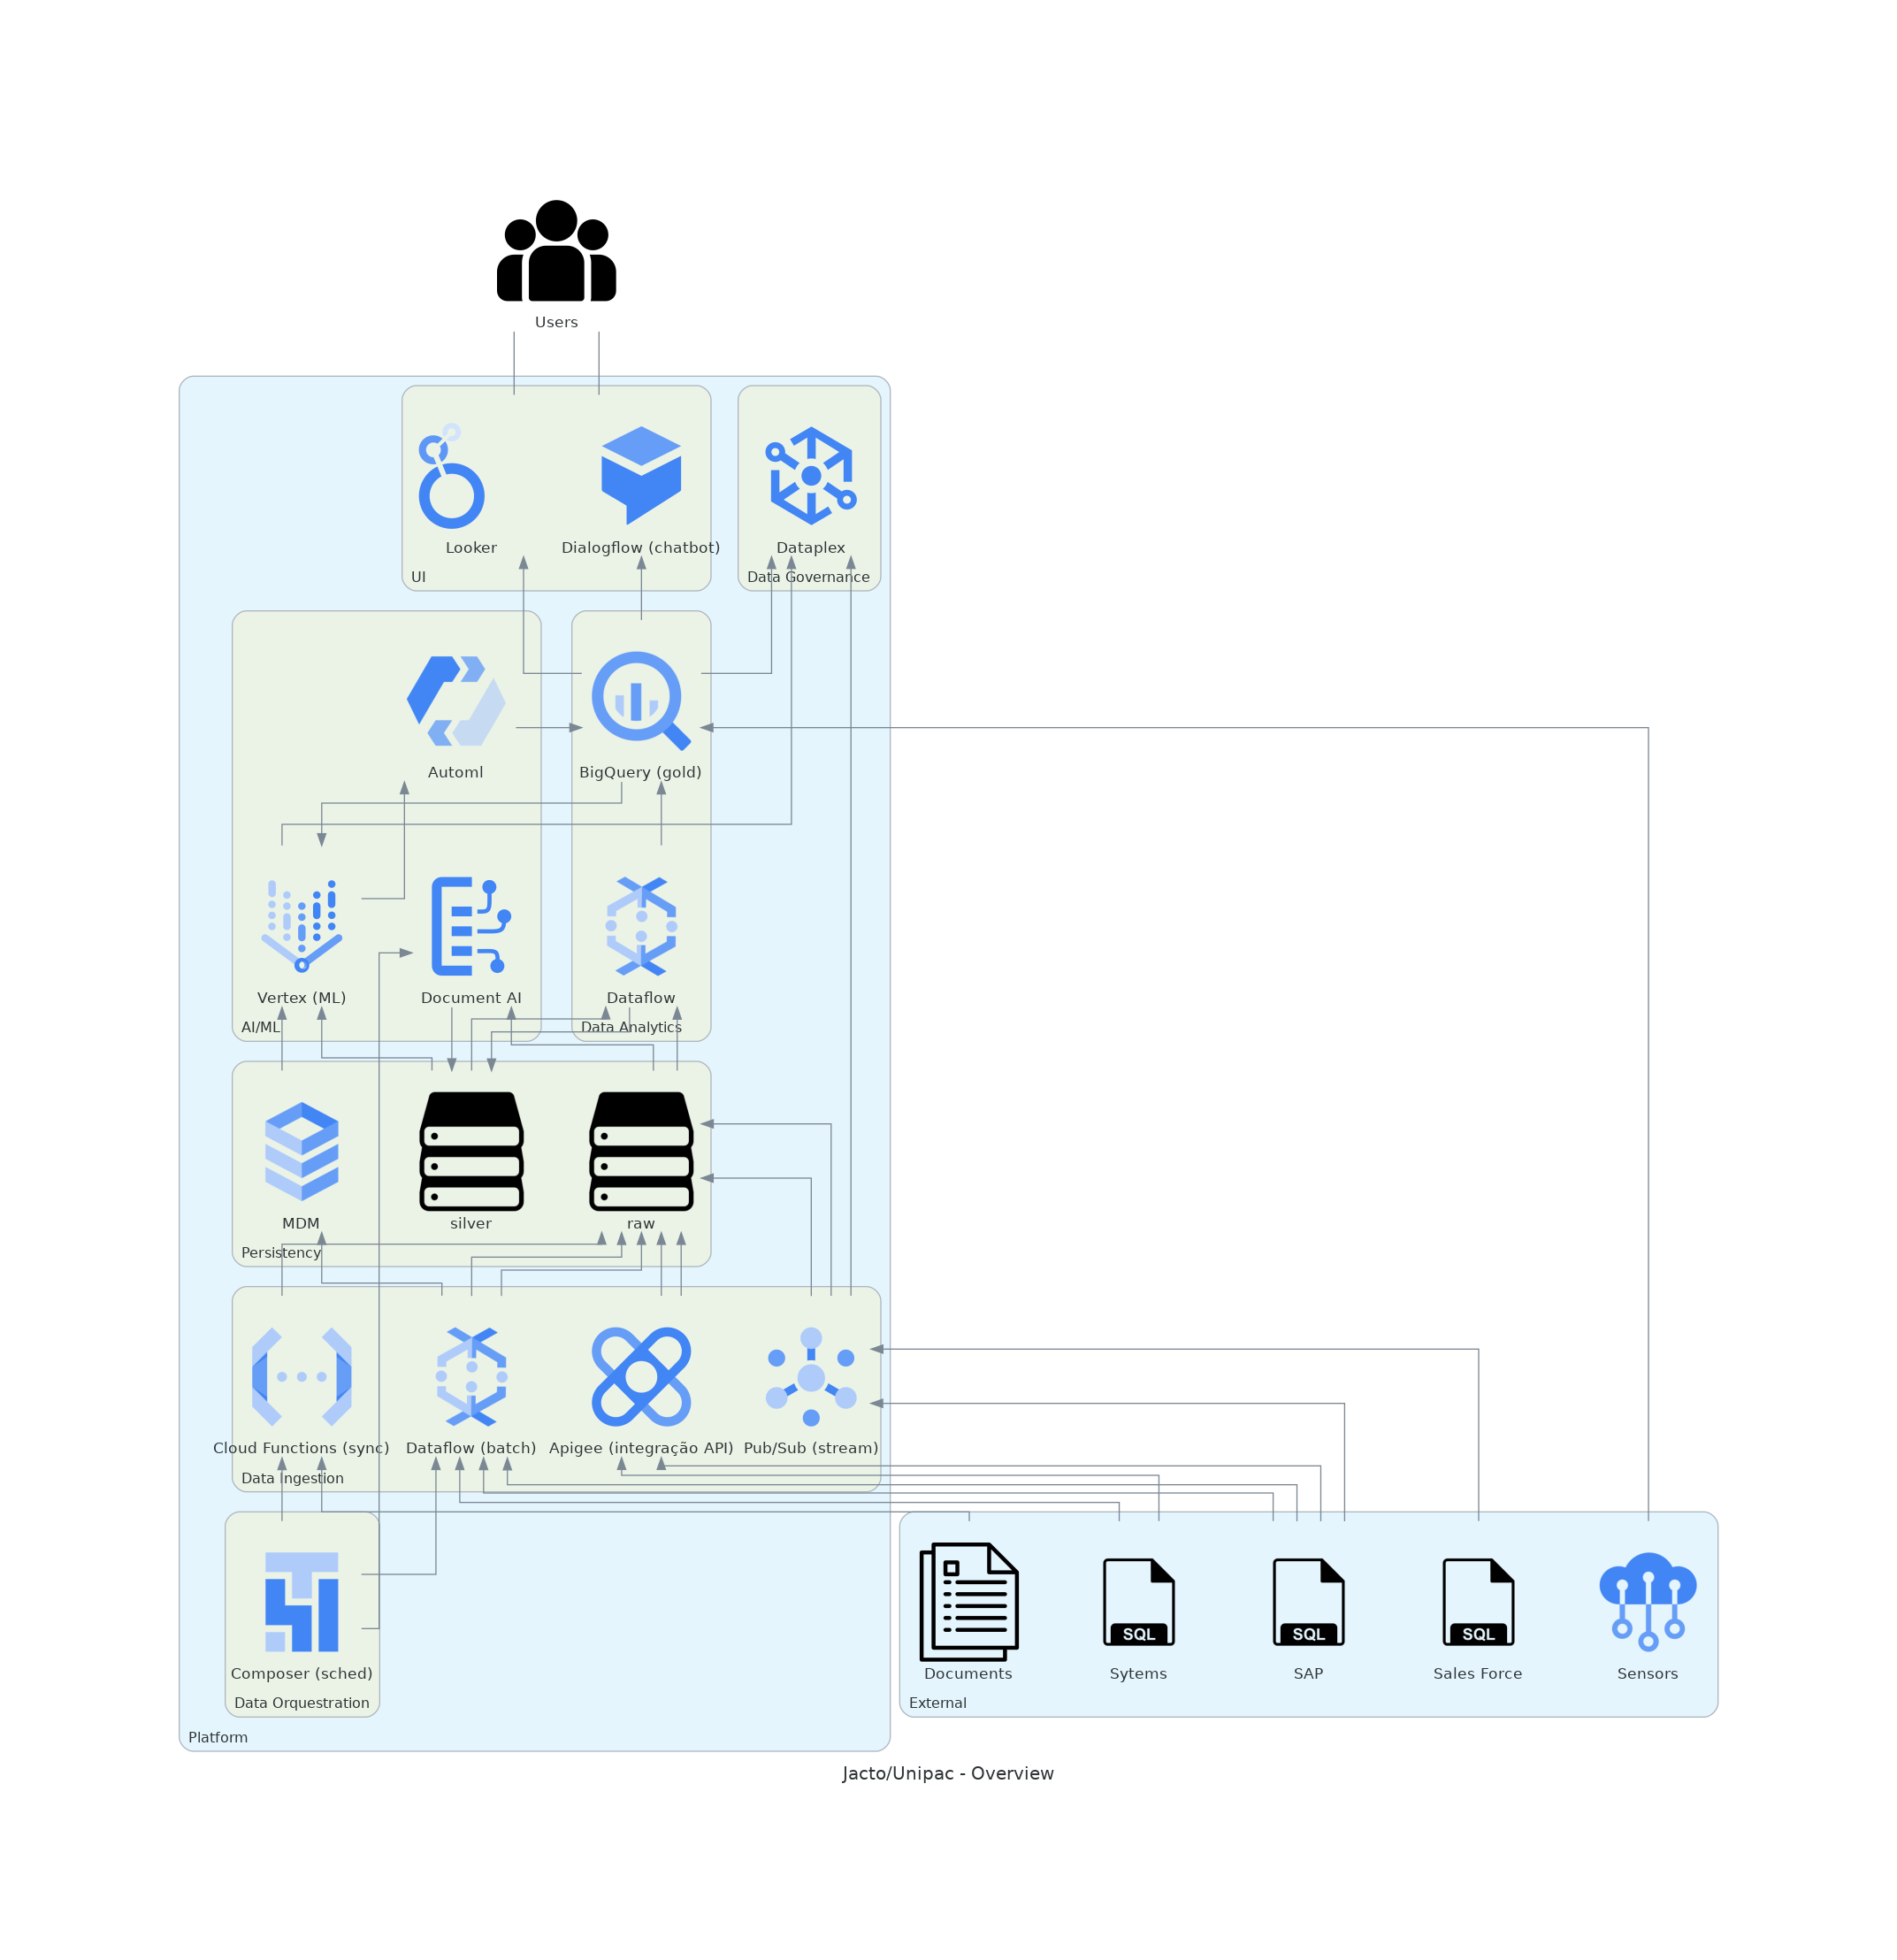

In [2]:
title = "Jacto/Unipac - Overview"
filename = "diagrams/jacto-unipac-overview"

# Criando o diagrama
with Diagram(title, 
             outformat=["png"],
             filename=filename,
             direction="BT",
             show=False) as diag:

    users = Custom("Users", "../assets/group.png")
    
    with Cluster("External"):           
        external_sap = SQL("SAP")
        external_salesforce = SQL("Sales Force")        
        external_system = SQL("Sytems")           
        documents = Custom("Documents", "../assets/document.png")
        iot = IotCore("Sensors")
  
    with Cluster("Platform"):    
        
      # Cluster para agrupar os componentes relacionados ao processamento de dados
        with Cluster("AI/ML"):            
            document_ai = Custom("Document AI", "../assets/google-cloud-icons/document_ai/document_ai.png")

        with Cluster("Data Ingestion"):            
            
            # Orquestração com Pub/Sub
            stream = Custom("Pub/Sub (stream)", "../assets/google-cloud-icons/pubsub/pubsub.png")
                        
            batch = Dataflow("Dataflow (batch)")
            
            # Automação com Cloud Functions
            sync = Functions("Cloud Functions (sync)") 

            # Integração de sistemas com Apigee
            api_integration = Custom("Apigee (integração API)", "../assets/google-cloud-icons/apigee_api_platform/apigee_api_platform.png")
            
        with Cluster("Data Analytics"):
            
            dataflow = Dataflow("Dataflow")
            
            # Repositório central BigQuery
            gold = Bigquery("BigQuery (gold)")

        with Cluster("Data Orquestration"):                    
            # Orquestração de workflows com Cloud Composer
            composer = Composer("Composer (sched)")  
                        

        with Cluster("UI"):    
            
            # Dashboards com Looker
            looker = Custom("Looker", "../assets/google-cloud-icons/looker/looker.png")  
            dialogflow = Custom("Dialogflow (chatbot)", "../assets/google-cloud-icons/dialogflow/dialogflow.png")  

        with Cluster("Persistency"): 
            
            raw = Storage("raw")   
            silver = Storage("silver") 
            mdm = gcp_sql("MDM")
            

        with Cluster("AI/ML"):
            
            vertex = Custom("Vertex (ML)", "../assets/google-cloud-icons/vertexai/vertexai.png")              
            automl = Automl("Automl")    

        with Cluster("Data Governance"):
            datacatalog = Custom("Dataplex", "../assets/google-cloud-icons/dataplex/dataplex.png")  


    composer >> [sync, batch, document_ai]

    ## data ingestion
    iot >> gold

    documents >> sync >> raw

    external_sap >> stream >> raw
    external_sap >> batch >> raw
    external_sap >> api_integration >> raw

    external_sap >> batch >> mdm
    
    external_system >> batch >> raw
    external_system >> api_integration >> raw

    external_salesforce >> stream >> raw

    ## data transformation
    raw >> [document_ai, dataflow] >> silver
    silver >> dataflow >> gold

    # machine learning
    [silver, gold, mdm] >> vertex >> automl >> gold
    
    ## ui
    gold >> dialogflow
    gold >> looker

    [vertex, gold, stream] >> datacatalog

    [dialogflow, looker] - users

diag


## Compras

### Proposta 4 - Automação e Padronização de Relacionamento com Fornecedores

- https://lookerstudio.google.com/u/0/reporting/2fbd4f65-175c-4499-b439-670d8df1ee62/page/p_t7ko9hf6kd?s=lkZ9R3OE6TA

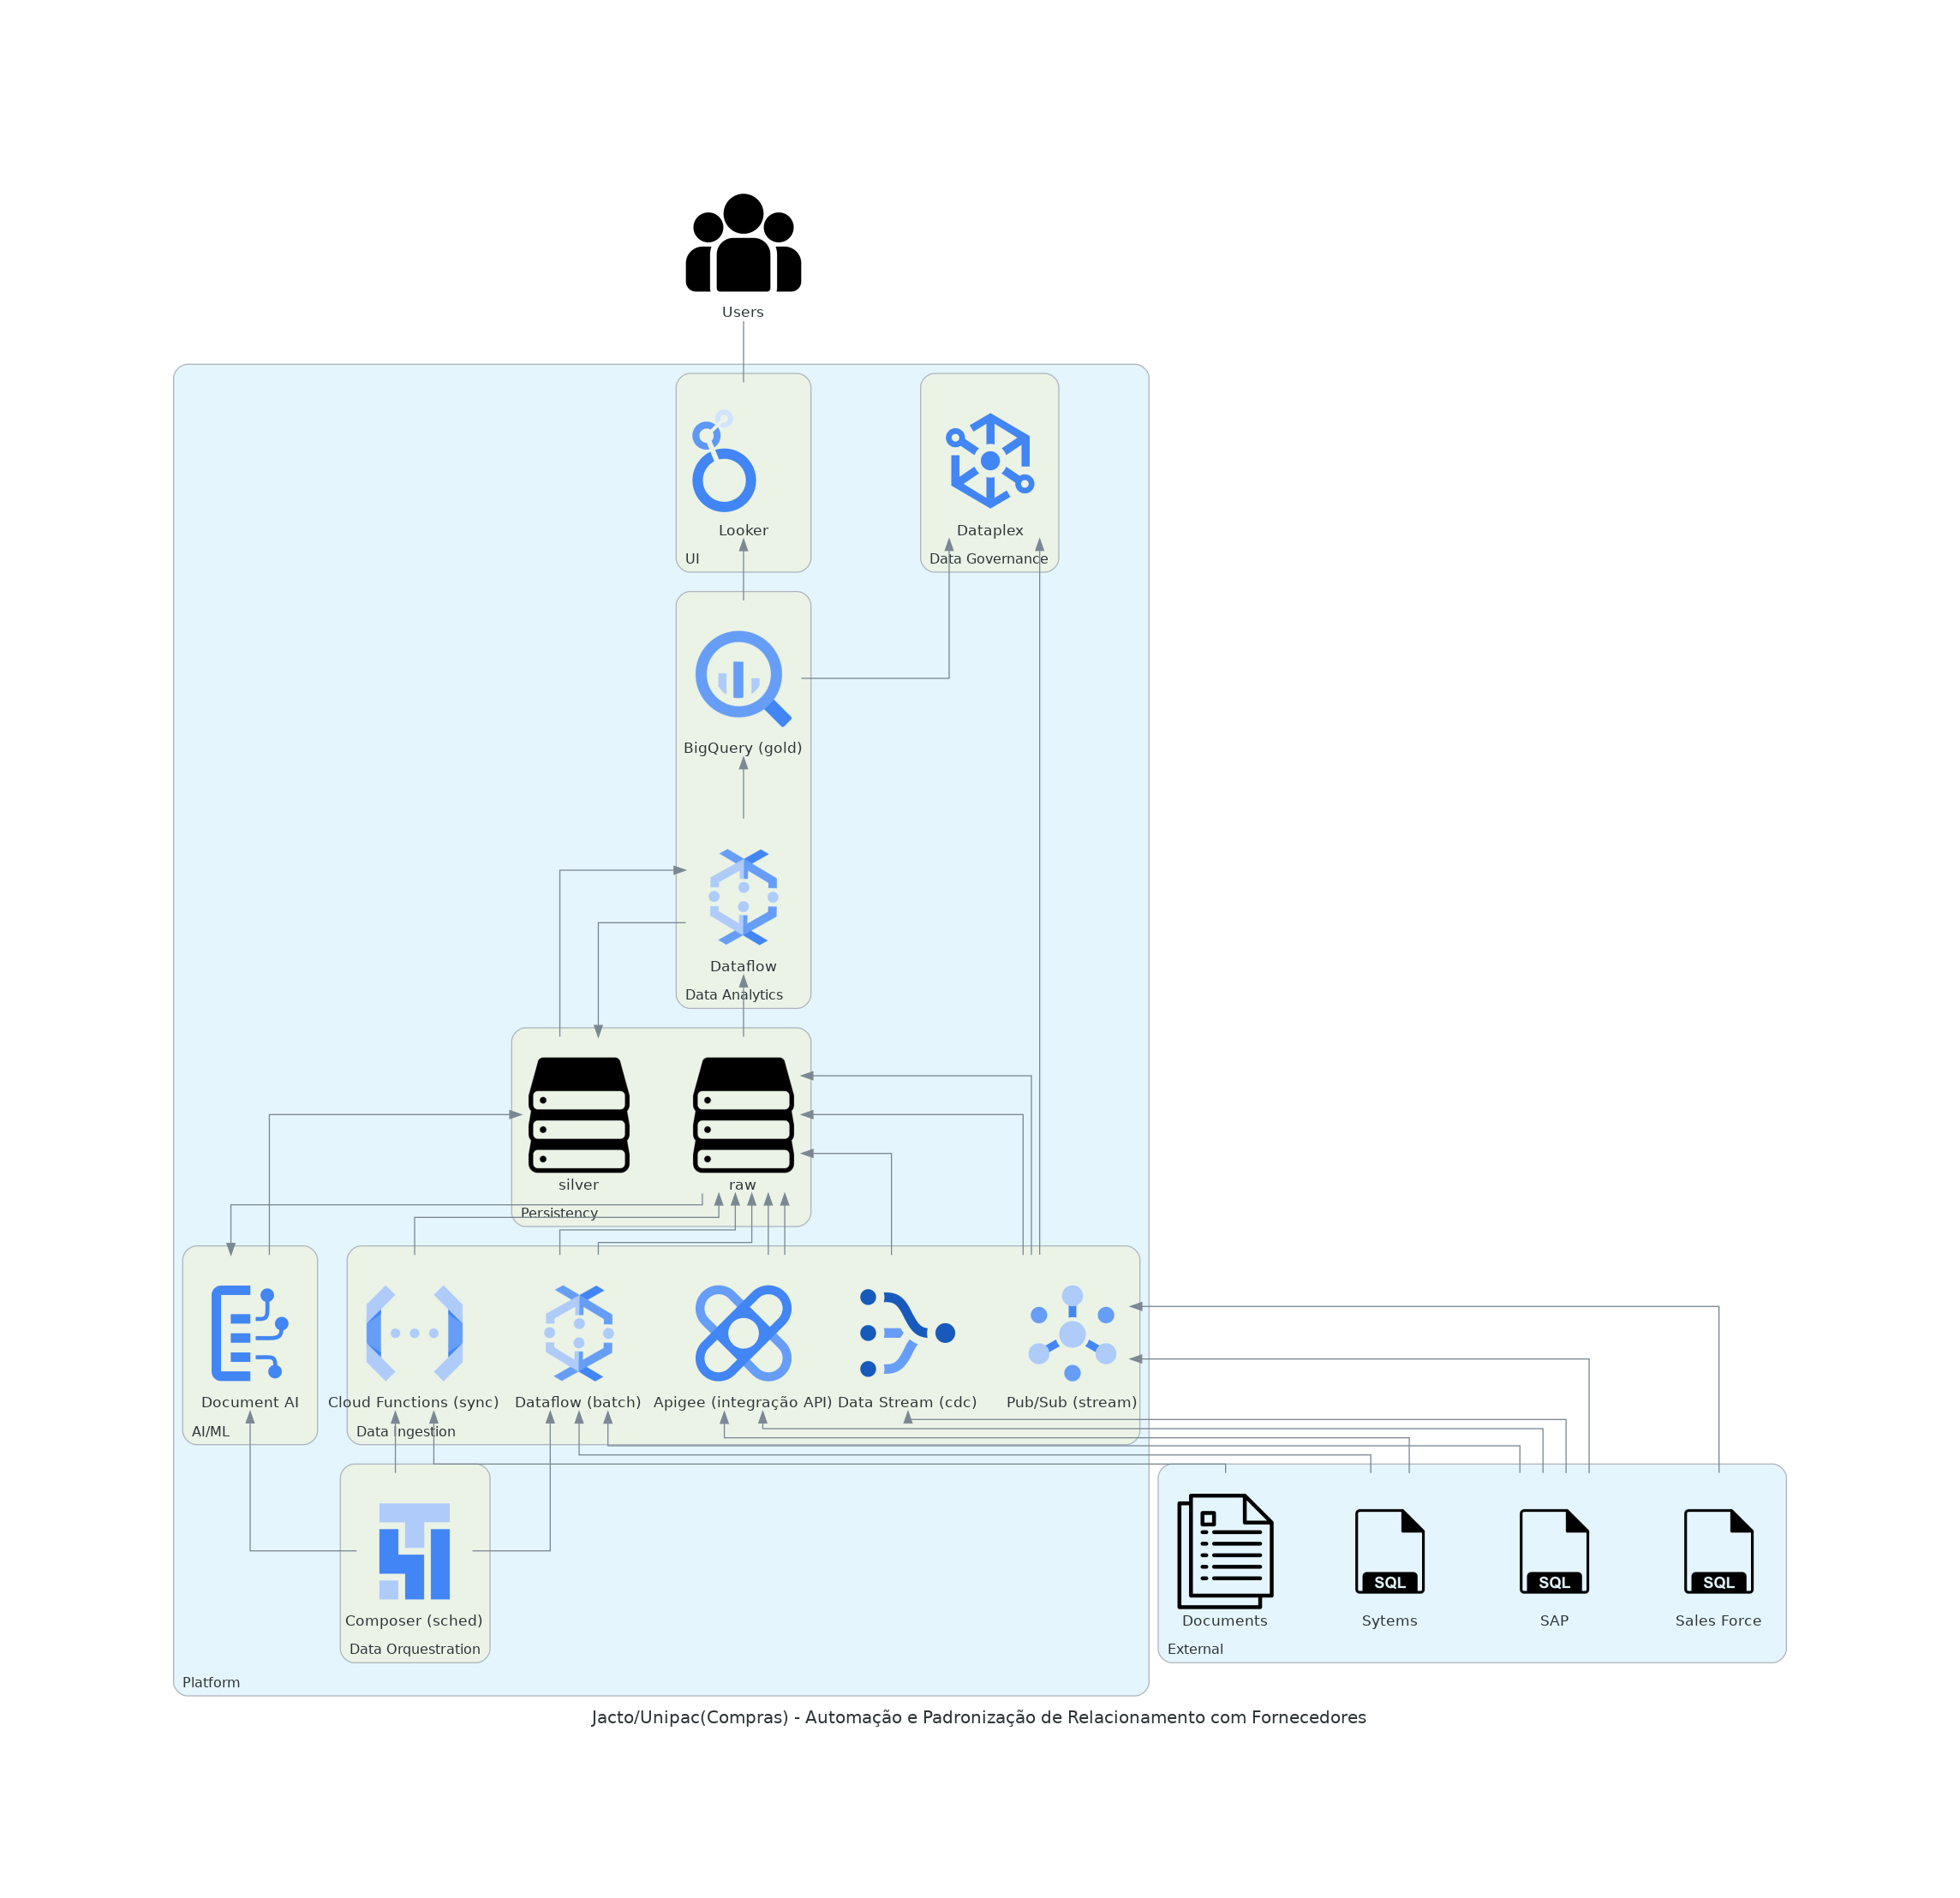

In [3]:
title = "Jacto/Unipac(Compras) - Automação e Padronização de Relacionamento com Fornecedores"
filename = "diagrams/jacto-unipac-compras-proposta4"

# Criando o diagrama
with Diagram(title, 
             outformat=["png"],
             filename=filename,
             direction="BT",
             show=False) as diag:

    users = Custom("Users", "../assets/group.png")

    with Cluster("External"):           
        external_sap = SQL("SAP")
        external_salesforce = SQL("Sales Force")        
        external_system = SQL("Sytems")           
        documents = Custom("Documents", "../assets/document.png")
    
    with Cluster("Platform"):    
        
      # Cluster para agrupar os componentes relacionados ao processamento de dados
        with Cluster("AI/ML"):            
            document_ai = Custom("Document AI", "../assets/google-cloud-icons/document_ai/document_ai.png")

        with Cluster("Data Ingestion"):            
            
            # Orquestração com Pub/Sub
            stream = Custom("Pub/Sub (stream)", "../assets/google-cloud-icons/pubsub/pubsub.png")
            
            cdc = Custom("Data Stream (cdc)", "../assets/google-cloud-icons/datastream/datastream.png")
            
            batch = Dataflow("Dataflow (batch)")
            
            # Automação com Cloud Functions
            sync = Functions("Cloud Functions (sync)") 

            # Integração de sistemas com Apigee
            api_integration = Custom("Apigee (integração API)", "../assets/google-cloud-icons/apigee_api_platform/apigee_api_platform.png")
            
        with Cluster("Data Analytics"):
            
            dataflow = Dataflow("Dataflow")
            
            # Repositório central BigQuery
            gold = Bigquery("BigQuery (gold)")

        with Cluster("Data Orquestration"):                    
            # Orquestração de workflows com Cloud Composer
            composer = Composer("Composer (sched)")  
                        

        with Cluster("UI"):    
            
            # Dashboards com Looker
            looker = Custom("Looker", "../assets/google-cloud-icons/looker/looker.png")  

        with Cluster("Persistency"): 
            
            raw = Storage("raw")   
            silver = Storage("silver") 
                   

        with Cluster("Data Governance"):
            
            datacatalog = Custom("Dataplex", "../assets/google-cloud-icons/dataplex/dataplex.png")  


    composer >> [sync, batch, document_ai]

    ## data ingestion
    documents >> sync >> raw

    external_sap >> stream >> raw
    external_sap >> cdc >> raw
    external_sap >> batch >> raw
    external_sap >> api_integration >> raw

    
    external_system >> batch >> raw
    external_system >> api_integration >> raw

    external_salesforce >> stream >> raw

    ## data transformation
    raw >> [document_ai, dataflow] >> silver
    silver >> dataflow >> gold

    ## ui
    gold >> looker

    [vertex, gold, stream] >> datacatalog

    looker - users

diag



### Proposta 2 - Gestão Preventiva e Automação de Materiais Indiretos

- https://lookerstudio.google.com/u/0/reporting/2fbd4f65-175c-4499-b439-670d8df1ee62/page/p_t7ko9hf6kd?s=lkZ9R3OE6TA

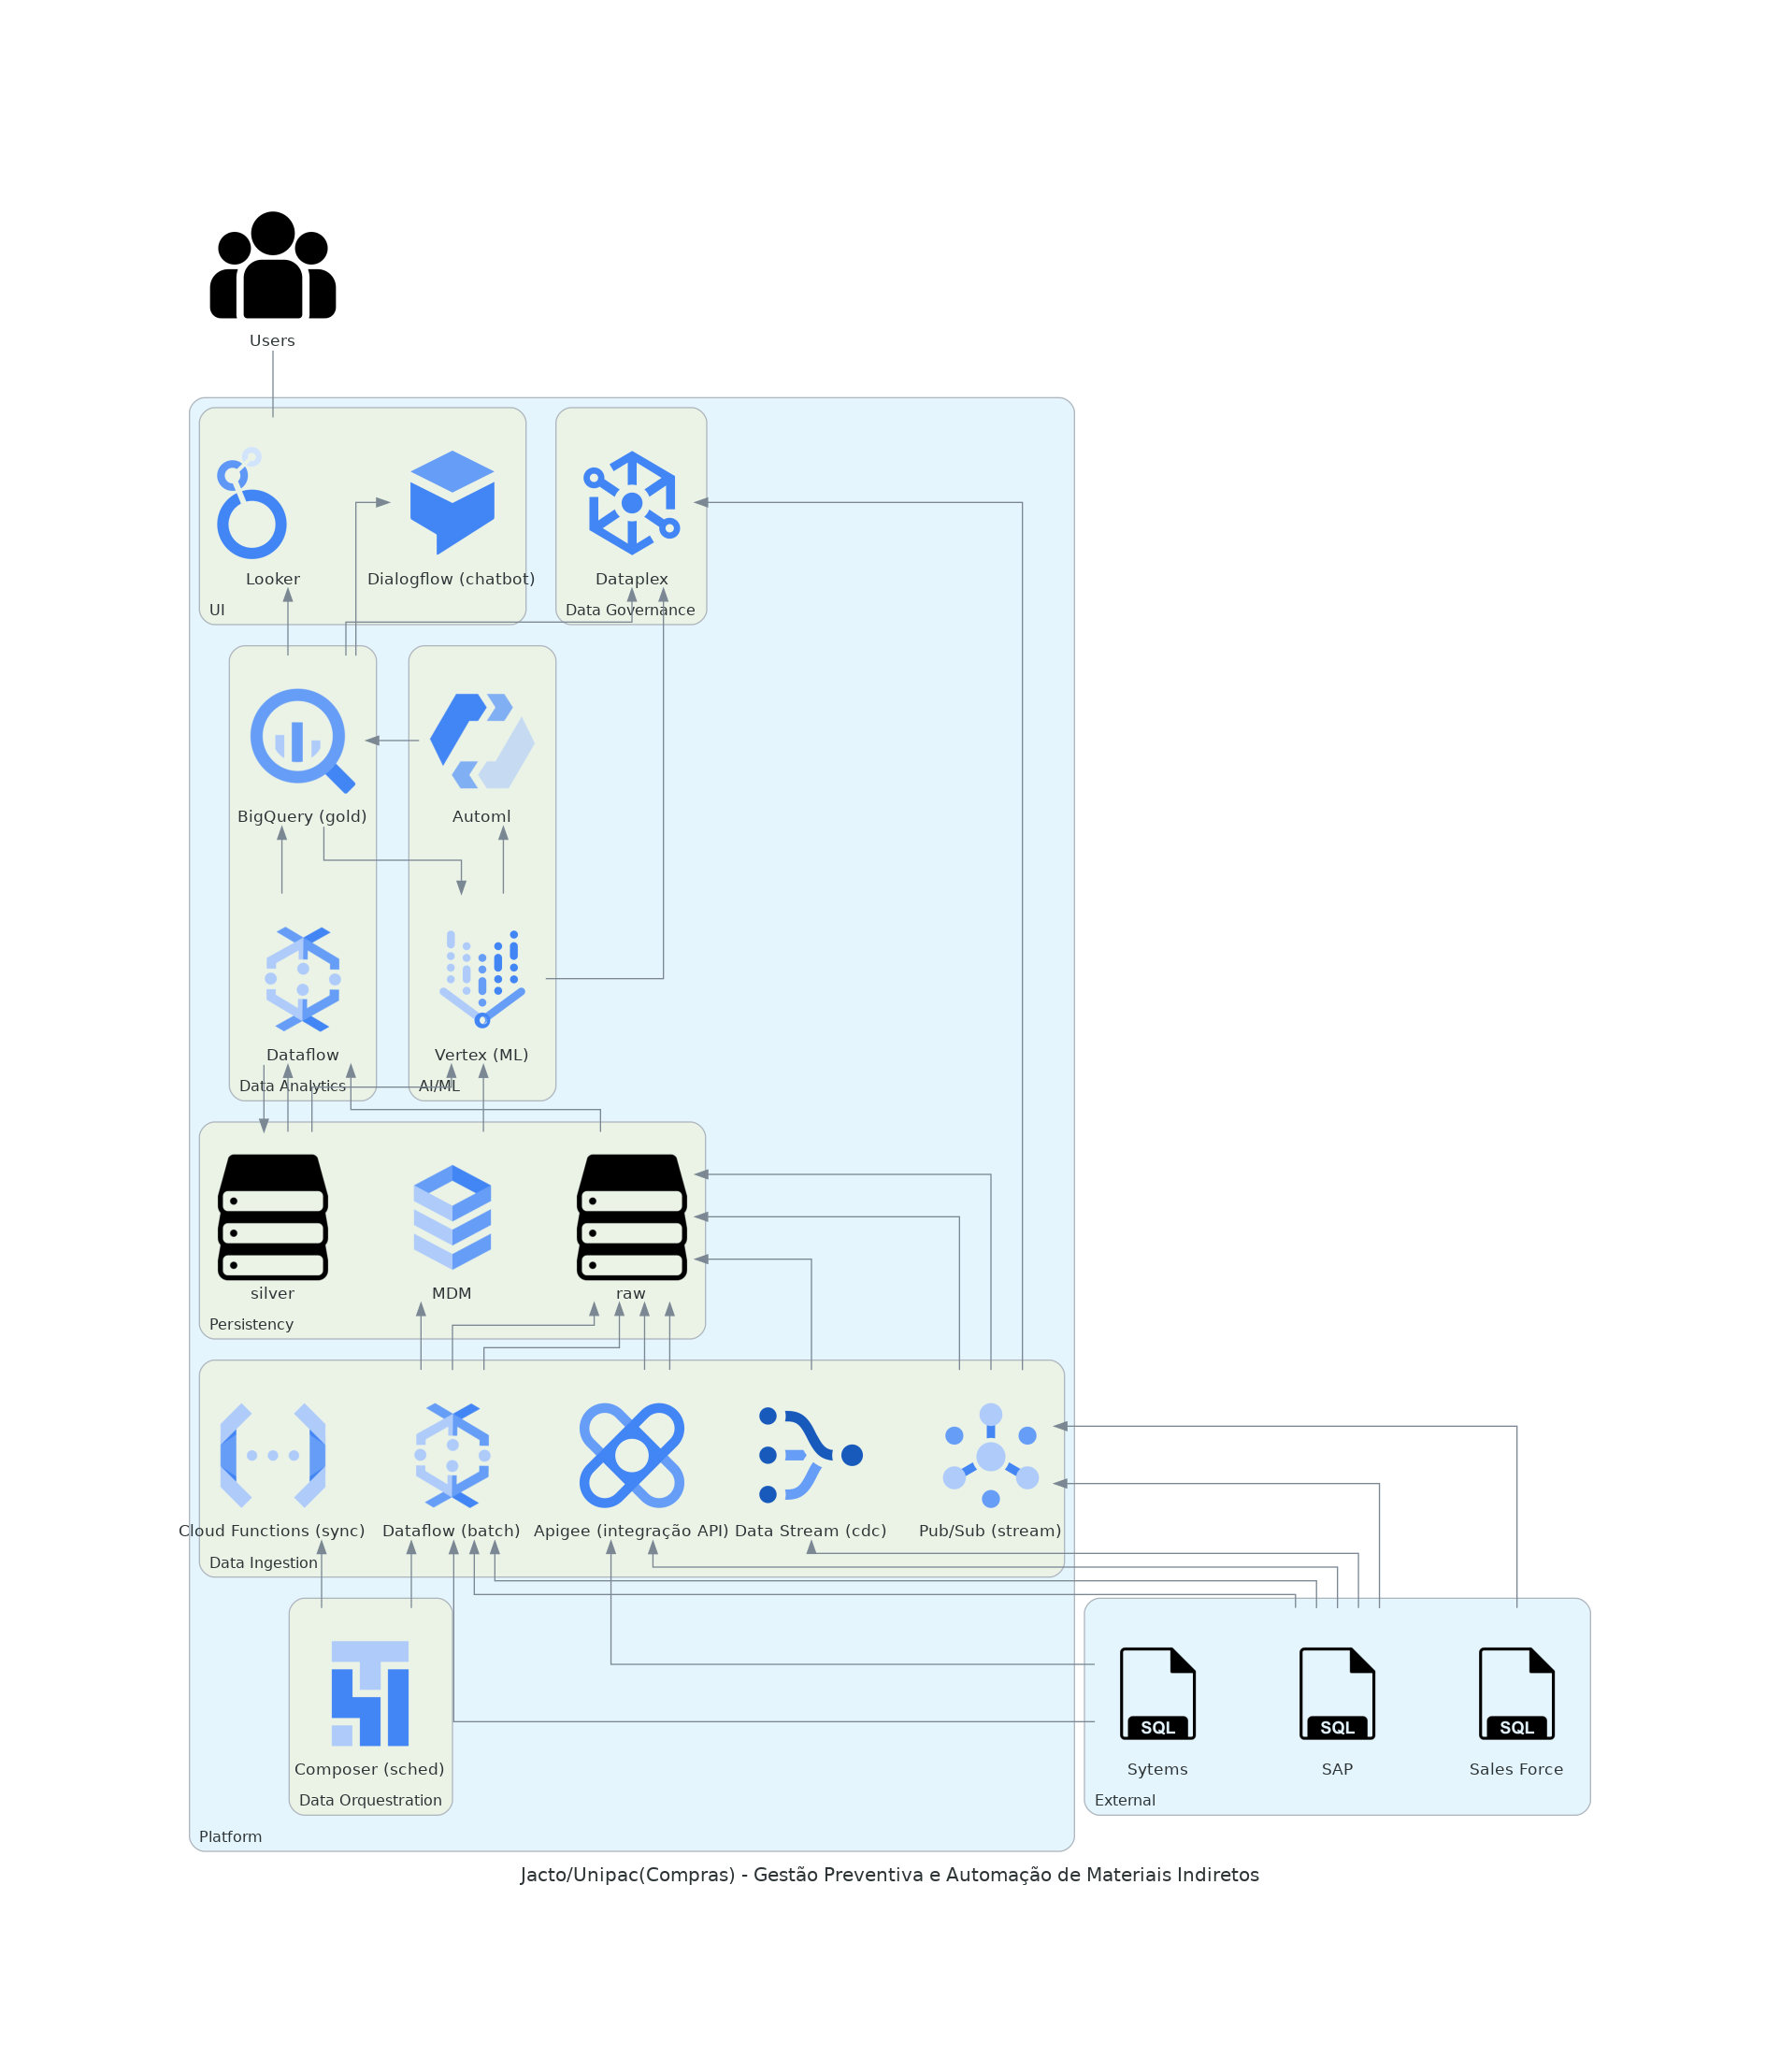

In [4]:
title = "Jacto/Unipac(Compras) - Gestão Preventiva e Automação de Materiais Indiretos"
filename = "diagrams/jacto-unipac-compras-proposta2"

# Criando o diagrama
with Diagram(title, 
             outformat=["png"],
             filename=filename,
             direction="BT",
             show=False) as diag:

    users = Custom("Users", "../assets/group.png")

    with Cluster("External"):           
        external_sap = SQL("SAP")
        external_salesforce = SQL("Sales Force")        
        external_system = SQL("Sytems")           
    
    with Cluster("Platform"):    
        
        with Cluster("Data Ingestion"):            
            
            # Orquestração com Pub/Sub
            stream = Custom("Pub/Sub (stream)", "../assets/google-cloud-icons/pubsub/pubsub.png")
            
            cdc = Custom("Data Stream (cdc)", "../assets/google-cloud-icons/datastream/datastream.png")
            
            batch = Dataflow("Dataflow (batch)")
            
            # Automação com Cloud Functions
            sync = Functions("Cloud Functions (sync)") 

            # Integração de sistemas com Apigee
            api_integration = Custom("Apigee (integração API)", "../assets/google-cloud-icons/apigee_api_platform/apigee_api_platform.png")
            
        with Cluster("Data Analytics"):
            
            dataflow = Dataflow("Dataflow")
            
            # Repositório central BigQuery
            gold = Bigquery("BigQuery (gold)")

        with Cluster("Data Orquestration"):                    
            # Orquestração de workflows com Cloud Composer
            composer = Composer("Composer (sched)")                          

        with Cluster("UI"):    
            
            # Dashboards com Looker
            looker = Custom("Looker", "../assets/google-cloud-icons/looker/looker.png")  
            dialogflow = Custom("Dialogflow (chatbot)", "../assets/google-cloud-icons/dialogflow/dialogflow.png")  

        with Cluster("Persistency"): 
            
            raw = Storage("raw")   
            silver = Storage("silver") 
            mdm = gcp_sql("MDM")
            
        with Cluster("AI/ML"):
            
            vertex = Custom("Vertex (ML)", "../assets/google-cloud-icons/vertexai/vertexai.png")              
            automl = Automl("Automl")    

        with Cluster("Data Governance"):
            datacatalog = Custom("Dataplex", "../assets/google-cloud-icons/dataplex/dataplex.png")  


    composer >> [sync, batch]

    ## data ingestion

    external_sap >> stream >> raw
    external_sap >> cdc >> raw
    external_sap >> batch >> raw
    external_sap >> api_integration >> raw

    external_sap >> batch >> mdm
    
    external_system >> batch >> raw
    external_system >> api_integration >> raw

    external_salesforce >> stream >> raw

    ## data transformation
    raw >> [dataflow] >> silver
    silver >> dataflow >> gold

    # machine learning
    [silver, gold, mdm] >> vertex >> automl >> gold
    
    ## ui
    gold >> dialogflow
    gold >> looker

    [vertex, gold, stream] >> datacatalog

    looker - users
diag


### Proposta 1 - Plataforma de Inteligência de Preços e Cotação

- https://lookerstudio.google.com/u/0/reporting/2fbd4f65-175c-4499-b439-670d8df1ee62/page/p_t7ko9hf6kd?s=lkZ9R3OE6TA

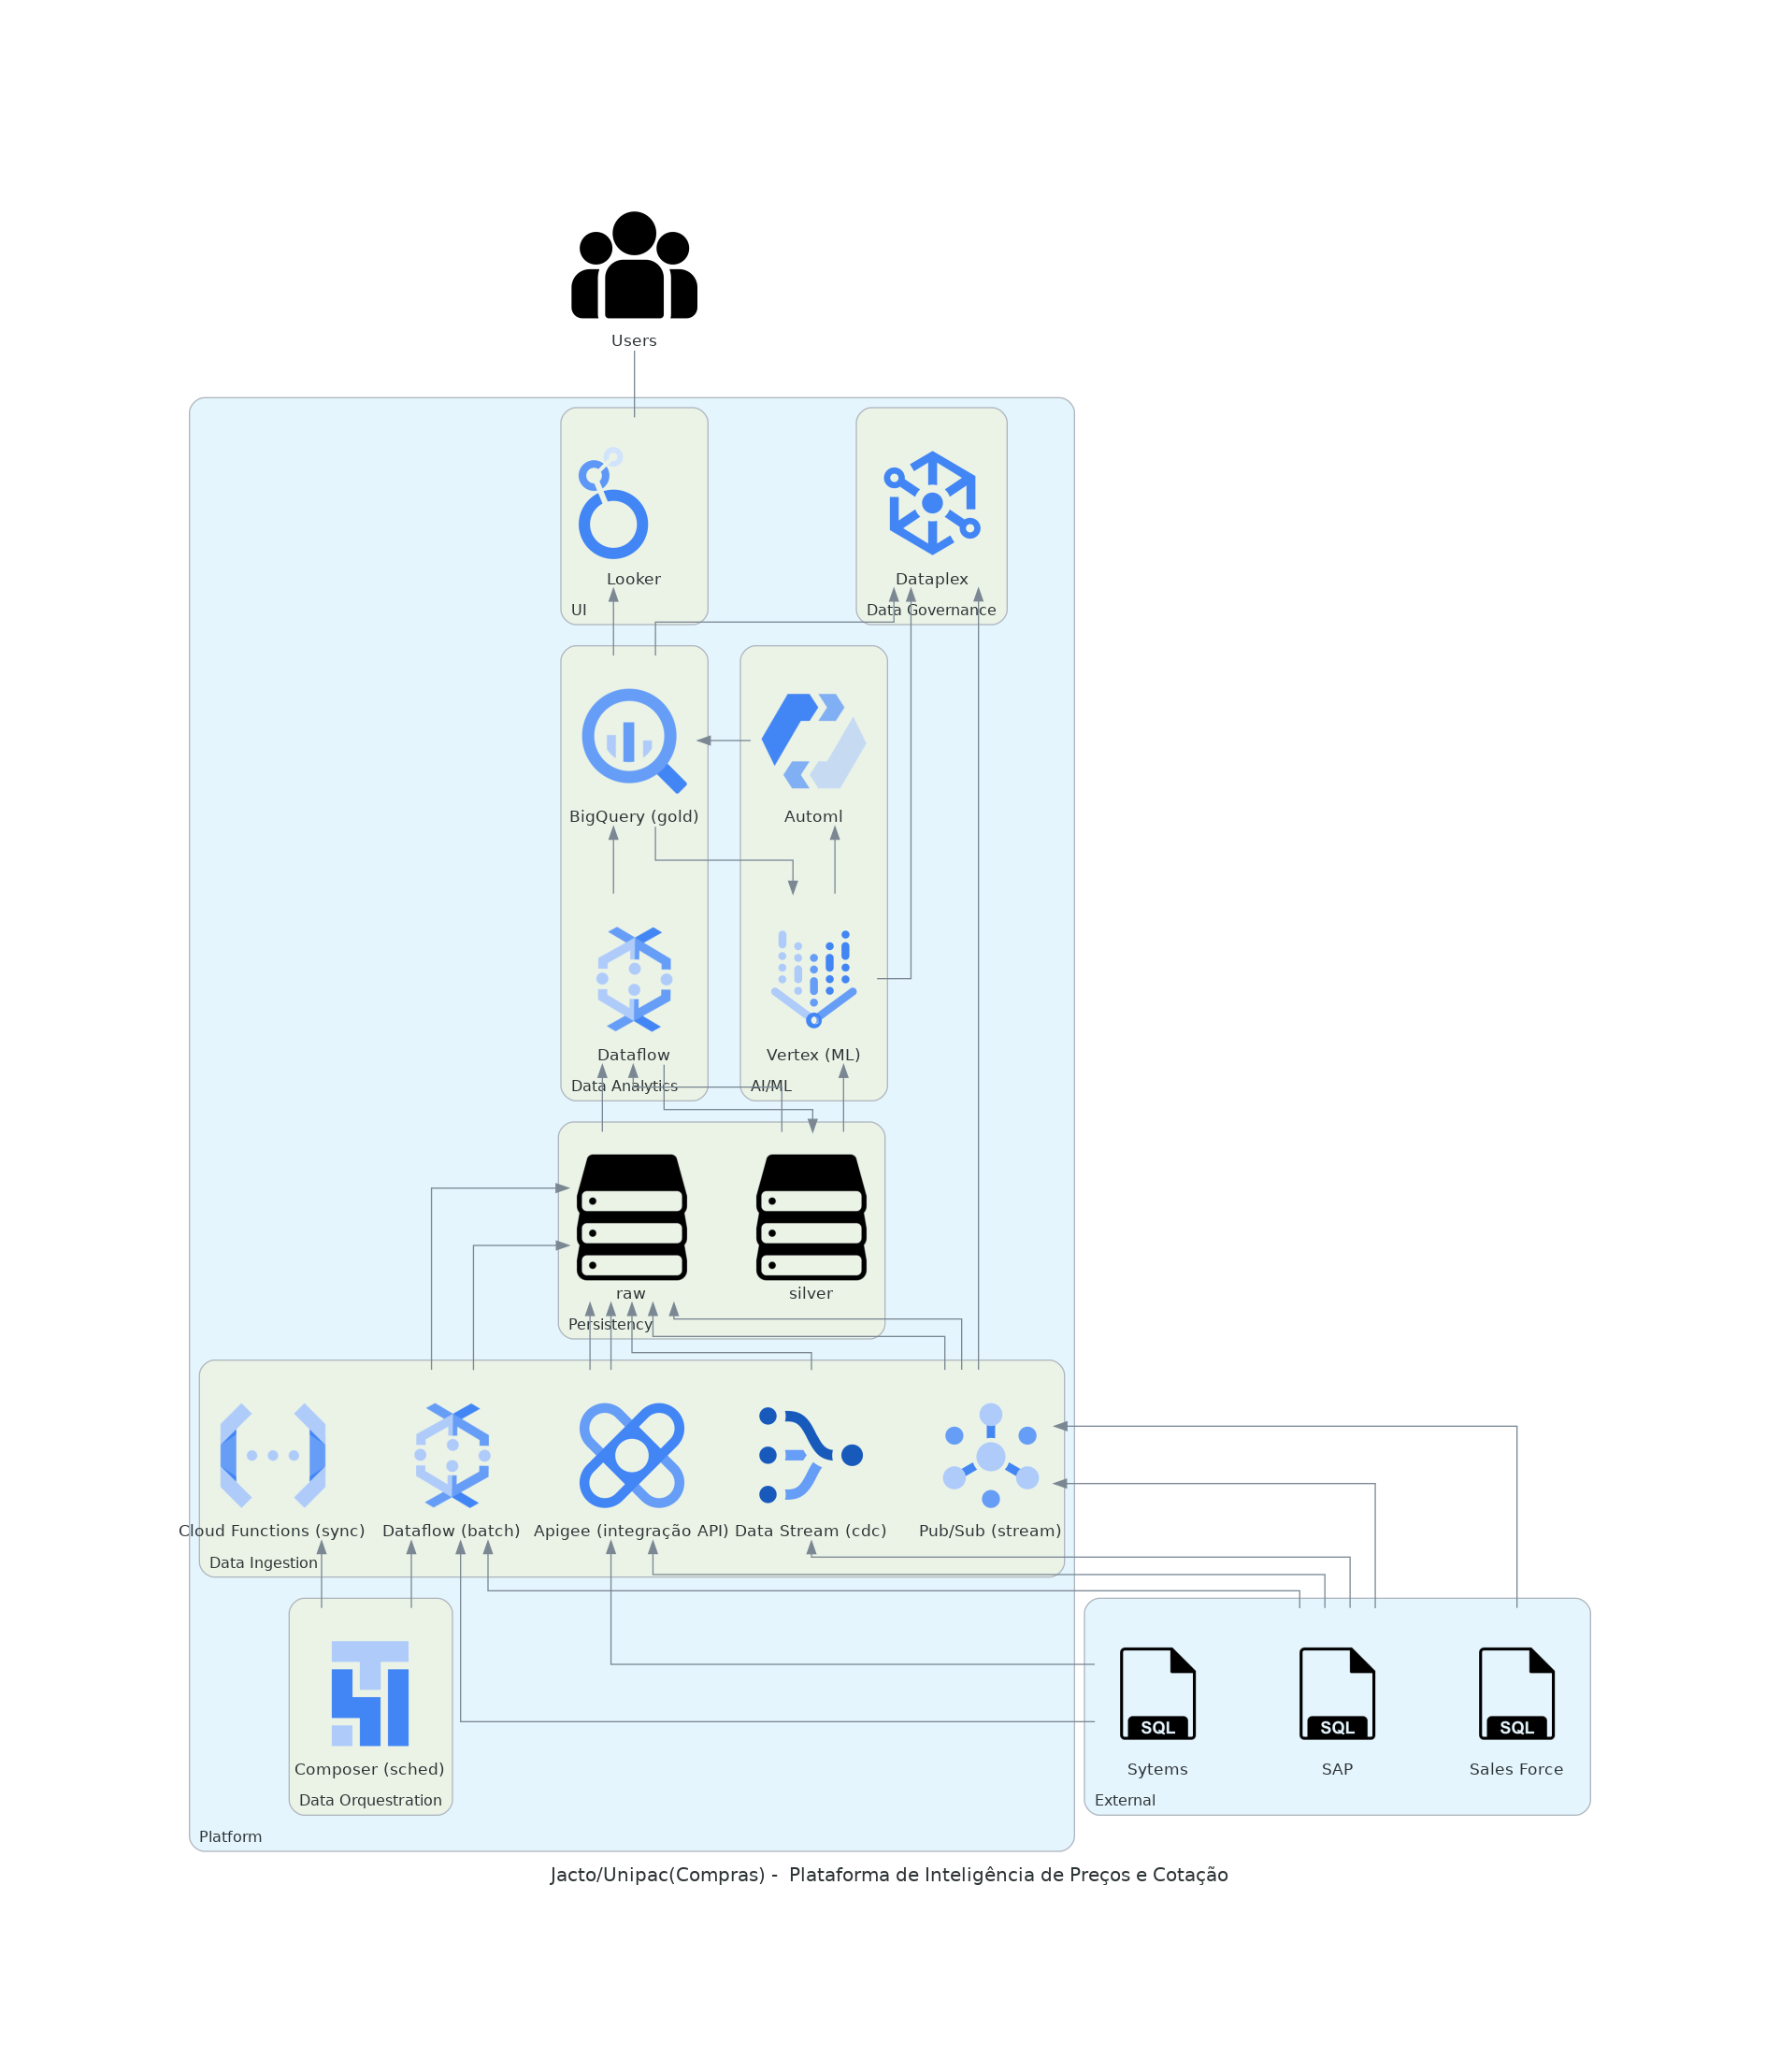

In [5]:
title = "Jacto/Unipac(Compras) -  Plataforma de Inteligência de Preços e Cotação"
filename = "diagrams/jacto-unipac-compras-proposta1"

# Criando o diagrama
with Diagram(title, 
             outformat=["png"],
             filename=filename,
             direction="BT",
             show=False) as diag:

    users = Custom("Users", "../assets/group.png")

    with Cluster("External"):           
        external_sap = SQL("SAP")
        external_salesforce = SQL("Sales Force")        
        external_system = SQL("Sytems")           
    
    with Cluster("Platform"):    
        
        with Cluster("Data Ingestion"):            
            
            # Orquestração com Pub/Sub
            stream = Custom("Pub/Sub (stream)", "../assets/google-cloud-icons/pubsub/pubsub.png")
            
            cdc = Custom("Data Stream (cdc)", "../assets/google-cloud-icons/datastream/datastream.png")
            
            batch = Dataflow("Dataflow (batch)")
            
            # Automação com Cloud Functions
            sync = Functions("Cloud Functions (sync)") 

            # Integração de sistemas com Apigee
            api_integration = Custom("Apigee (integração API)", "../assets/google-cloud-icons/apigee_api_platform/apigee_api_platform.png")
            
        with Cluster("Data Analytics"):
            
            dataflow = Dataflow("Dataflow")
            
            # Repositório central BigQuery
            gold = Bigquery("BigQuery (gold)")

        with Cluster("Data Orquestration"):                    
            # Orquestração de workflows com Cloud Composer
            composer = Composer("Composer (sched)")  
                        

        with Cluster("UI"):    
            
            # Dashboards com Looker
            looker = Custom("Looker", "../assets/google-cloud-icons/looker/looker.png")  

        with Cluster("Persistency"): 
            
            raw = Storage("raw")   
            silver = Storage("silver") 
            

        with Cluster("AI/ML"):
            
            vertex = Custom("Vertex (ML)", "../assets/google-cloud-icons/vertexai/vertexai.png")              
            automl = Automl("Automl")    

        with Cluster("Data Governance"):
            datacatalog = Custom("Dataplex", "../assets/google-cloud-icons/dataplex/dataplex.png")  


    composer >> [sync, batch]

    ## data ingestion

    external_sap >> stream >> raw
    external_sap >> cdc >> raw
    external_sap >> batch >> raw
    external_sap >> api_integration >> raw

    
    external_system >> batch >> raw
    external_system >> api_integration >> raw

    external_salesforce >> stream >> raw

    ## data transformation
    raw >> [dataflow] >> silver
    silver >> dataflow >> gold

    # machine learning
    [silver, gold] >> vertex >> automl >> gold
    
    ## ui
    gold >> looker

    [vertex, gold, stream] >> datacatalog

    looker - users

diag


## S&OP

### Proposta 8 - S&OP Integrado e Logística Inteligente

- https://lookerstudio.google.com/reporting/6999da64-695a-46a6-bb43-21d7f8961992/page/p_lmysdih6kd?s=m2mAlpUVRVA

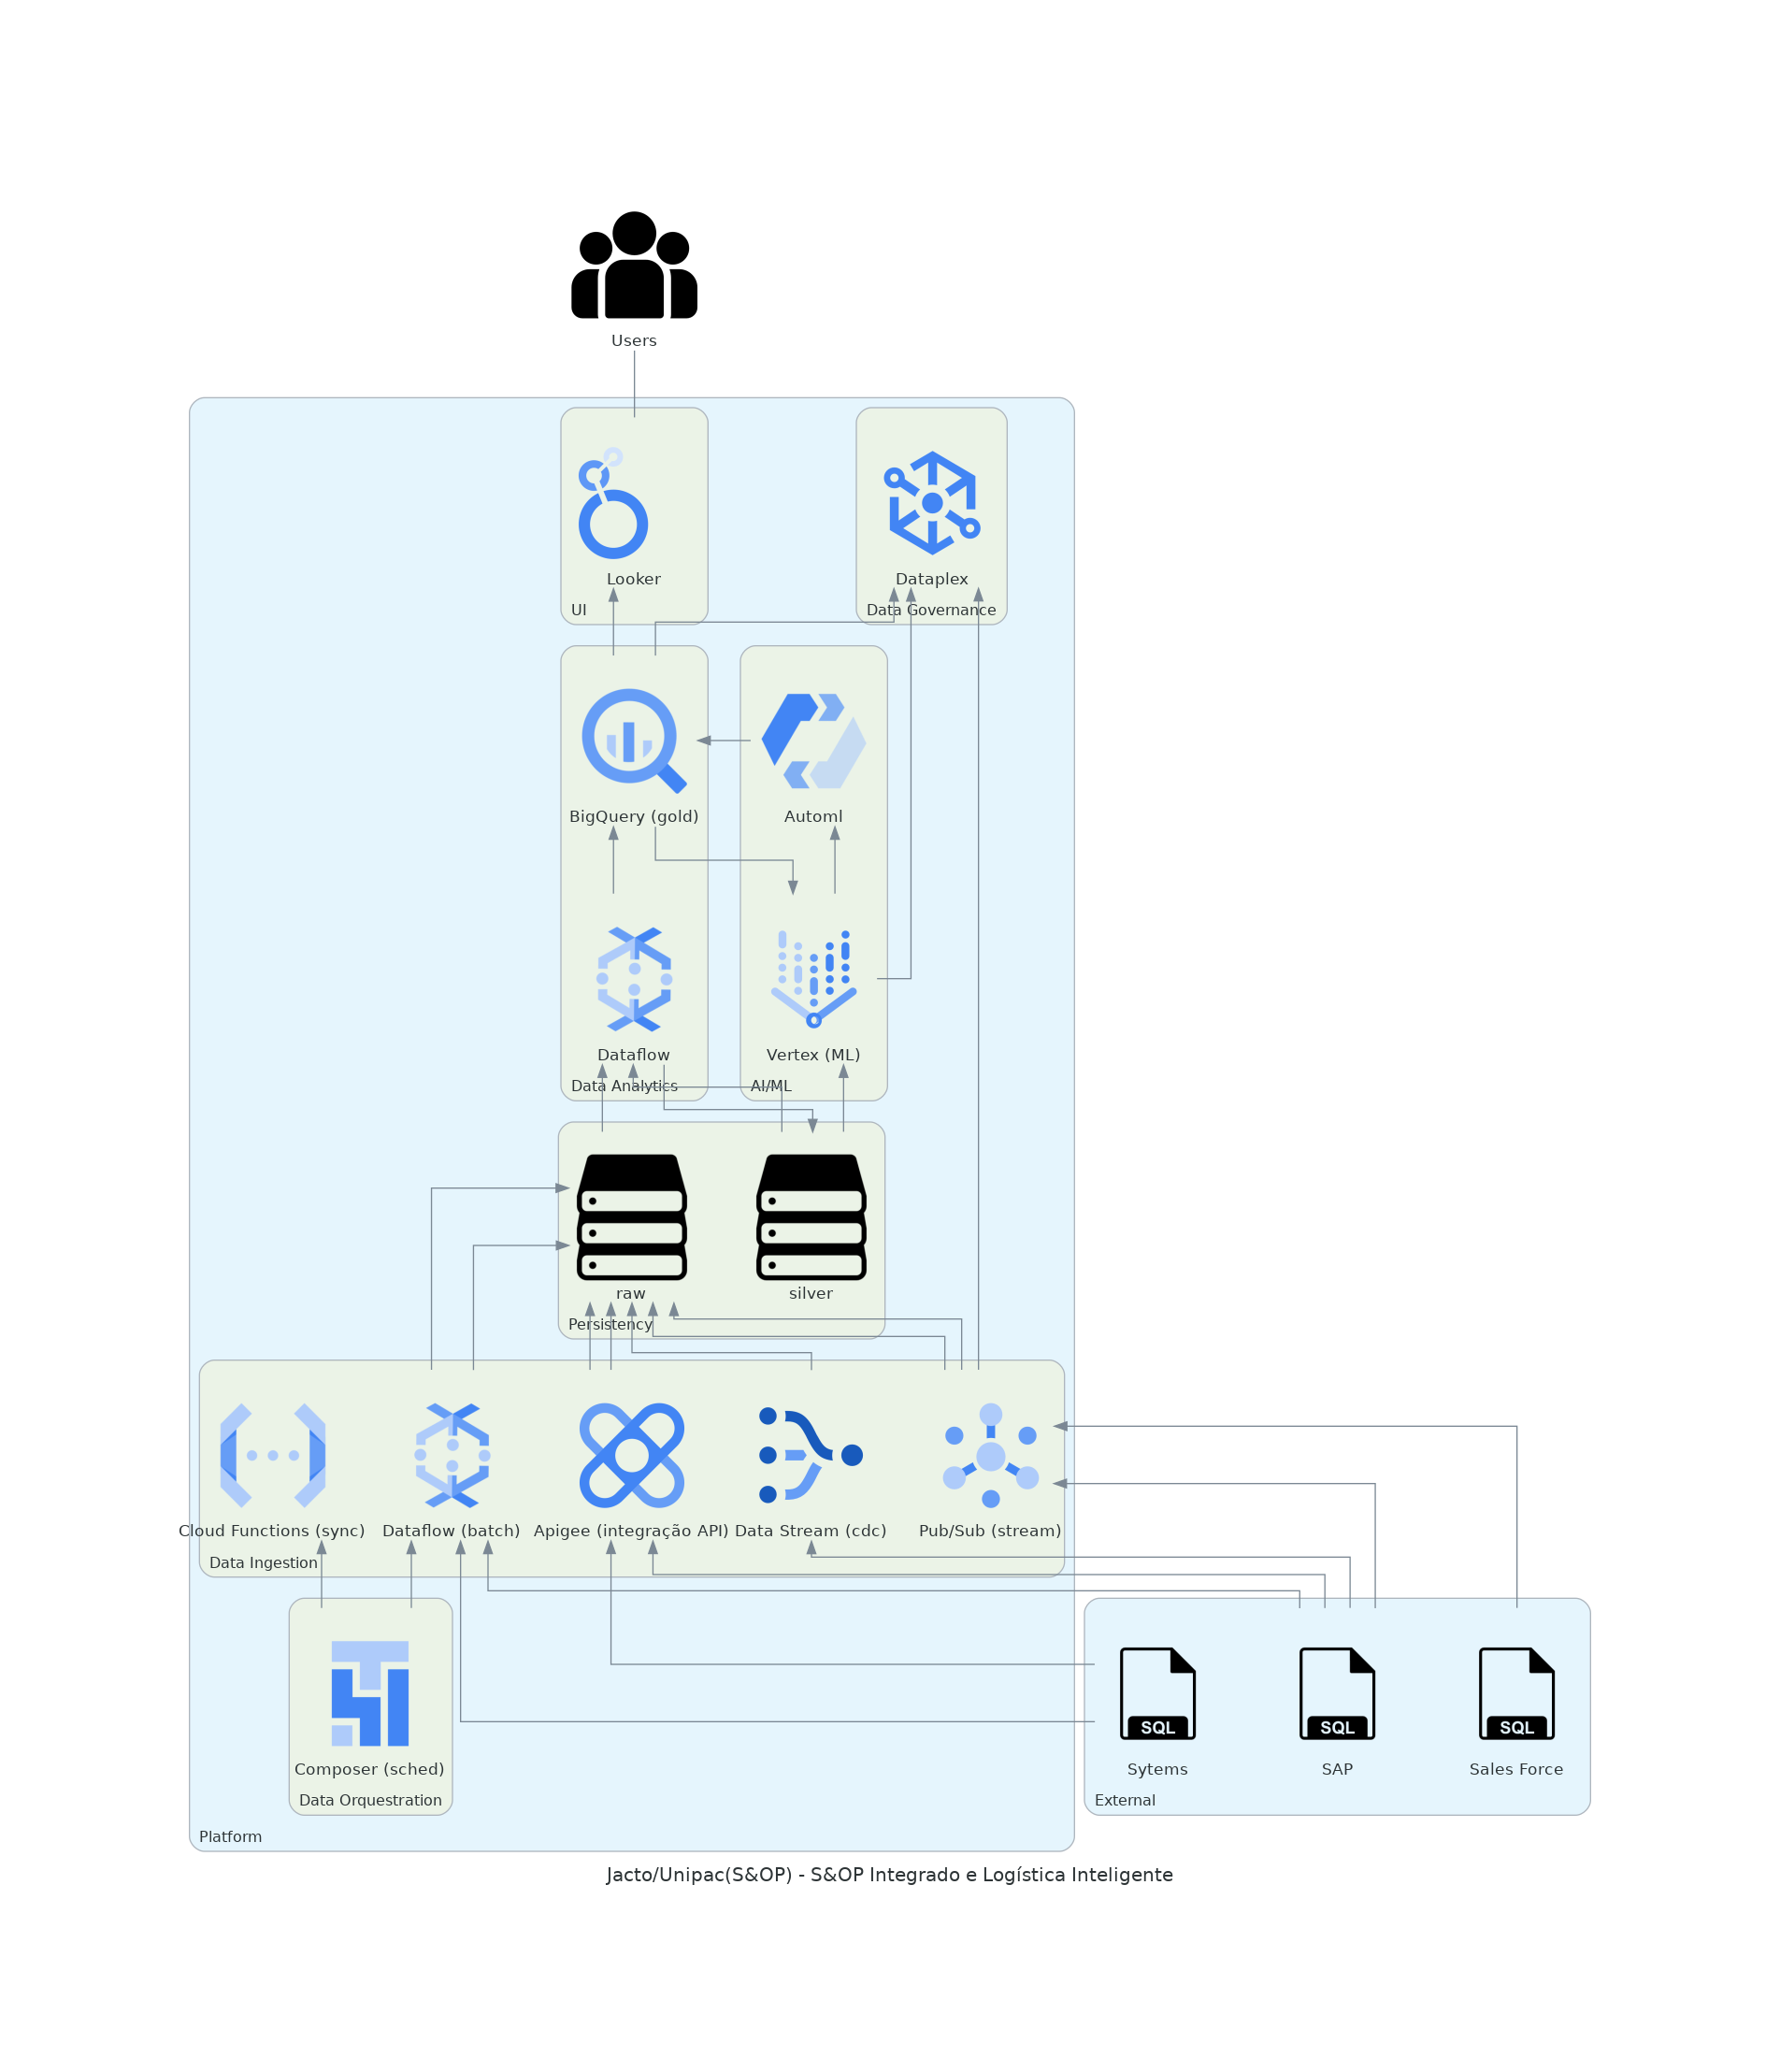

In [6]:
title = "Jacto/Unipac(S&OP) - S&OP Integrado e Logística Inteligente"
filename = "diagrams/jacto-unipac-sop-proposta8"


# Criando o diagrama
with Diagram(title, 
             outformat=["png"],
             filename=filename,
             direction="BT",
             show=False) as diag:

    users = Custom("Users", "../assets/group.png")
    
    with Cluster("External"):           
        external_sap = SQL("SAP")
        external_salesforce = SQL("Sales Force")        
        external_system = SQL("Sytems")           
    
    with Cluster("Platform"):    
        
        with Cluster("Data Ingestion"):            
            
            # Orquestração com Pub/Sub
            stream = Custom("Pub/Sub (stream)", "../assets/google-cloud-icons/pubsub/pubsub.png")
            
            cdc = Custom("Data Stream (cdc)", "../assets/google-cloud-icons/datastream/datastream.png")
            
            batch = Dataflow("Dataflow (batch)")
            
            # Automação com Cloud Functions
            sync = Functions("Cloud Functions (sync)") 

            # Integração de sistemas com Apigee
            api_integration = Custom("Apigee (integração API)", "../assets/google-cloud-icons/apigee_api_platform/apigee_api_platform.png")
            
        with Cluster("Data Analytics"):
            
            dataflow = Dataflow("Dataflow")
            
            # Repositório central BigQuery
            gold = Bigquery("BigQuery (gold)")

        with Cluster("Data Orquestration"):                    
            # Orquestração de workflows com Cloud Composer
            composer = Composer("Composer (sched)")  
                        

        with Cluster("UI"):    
            
            # Dashboards com Looker
            looker = Custom("Looker", "../assets/google-cloud-icons/looker/looker.png")  

        with Cluster("Persistency"): 
            
            raw = Storage("raw")   
            silver = Storage("silver") 
            

        with Cluster("AI/ML"):
            
            vertex = Custom("Vertex (ML)", "../assets/google-cloud-icons/vertexai/vertexai.png")              
            automl = Automl("Automl")    

        with Cluster("Data Governance"):
            datacatalog = Custom("Dataplex", "../assets/google-cloud-icons/dataplex/dataplex.png")  


    composer >> [sync, batch]

    ## data ingestion

    external_sap >> stream >> raw
    external_sap >> cdc >> raw
    external_sap >> batch >> raw
    external_sap >> api_integration >> raw

    
    external_system >> batch >> raw
    external_system >> api_integration >> raw

    external_salesforce >> stream >> raw

    ## data transformation
    raw >> [dataflow] >> silver
    silver >> dataflow >> gold

    # machine learning
    [silver, gold] >> vertex >> automl >> gold
    
    ## ui
    gold >> looker

    [vertex, gold, stream] >> datacatalog

    looker - users

diag


## Centralidade do Cliente

### Proposta 7 - Plataforma Centralizada de Relacionamento e Pós-Venda

https://lookerstudio.google.com/u/0/reporting/044a3b46-11b4-439e-8437-4c5b3d16ee6f/page/p_lmysdih6kd

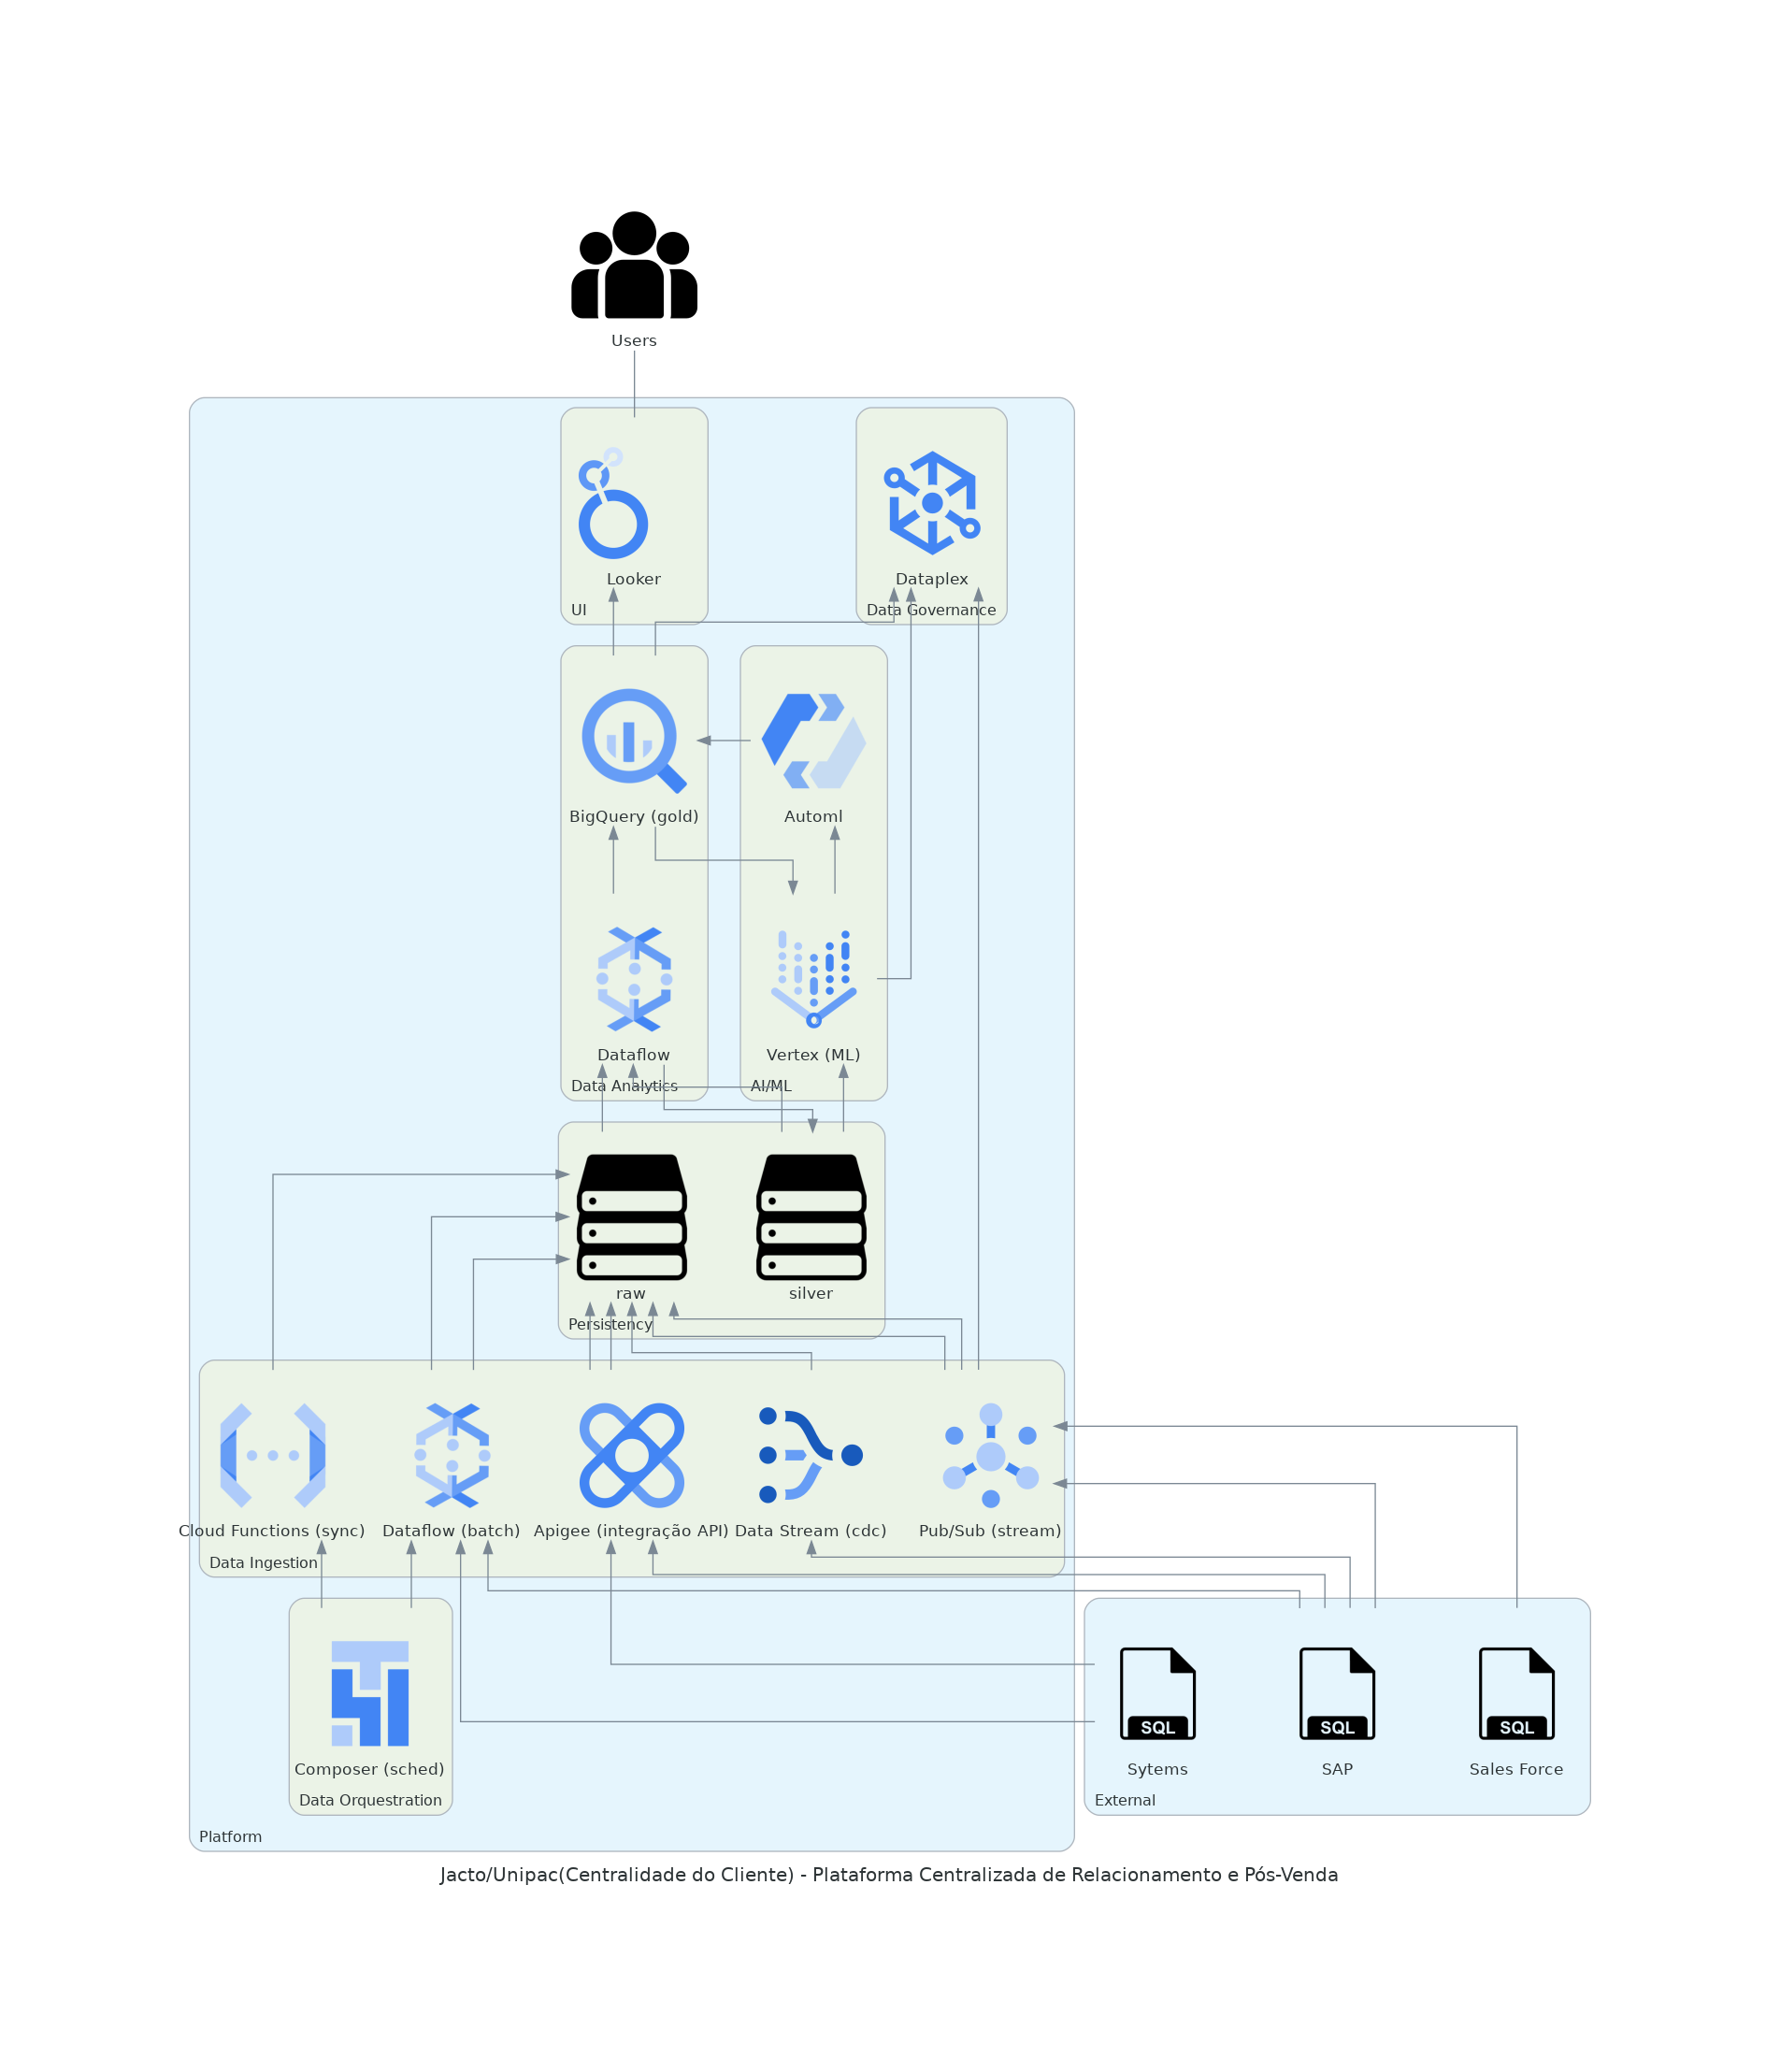

In [7]:
title = "Jacto/Unipac(Centralidade do Cliente) - Plataforma Centralizada de Relacionamento e Pós-Venda"
filename = "diagrams/jacto-unipac-centralidade-proposta7"

# Criando o diagrama
with Diagram(title, 
             outformat=["png"],
             filename=filename,
             direction="BT",
             show=False) as diag:

    users = Custom("Users", "../assets/group.png")

    
    with Cluster("External"):           
        external_sap = SQL("SAP")
        external_salesforce = SQL("Sales Force")        
        external_system = SQL("Sytems")           
    
    with Cluster("Platform"):    
        
        with Cluster("Data Ingestion"):            
            
            # Orquestração com Pub/Sub
            stream = Custom("Pub/Sub (stream)", "../assets/google-cloud-icons/pubsub/pubsub.png")
            
            cdc = Custom("Data Stream (cdc)", "../assets/google-cloud-icons/datastream/datastream.png")
            
            batch = Dataflow("Dataflow (batch)")
            
            # Automação com Cloud Functions
            sync = Functions("Cloud Functions (sync)") 

            # Integração de sistemas com Apigee
            api_integration = Custom("Apigee (integração API)", "../assets/google-cloud-icons/apigee_api_platform/apigee_api_platform.png")
            
        with Cluster("Data Analytics"):
            
            dataflow = Dataflow("Dataflow")
            
            # Repositório central BigQuery
            gold = Bigquery("BigQuery (gold)")

        with Cluster("Data Orquestration"):                    
            # Orquestração de workflows com Cloud Composer
            composer = Composer("Composer (sched)")  
                        

        with Cluster("UI"):    
            
            # Dashboards com Looker
            looker = Custom("Looker", "../assets/google-cloud-icons/looker/looker.png")  

        with Cluster("Persistency"): 
            
            raw = Storage("raw")   
            silver = Storage("silver") 
            

        with Cluster("AI/ML"):
            
            vertex = Custom("Vertex (ML)", "../assets/google-cloud-icons/vertexai/vertexai.png")              
            automl = Automl("Automl")    

        with Cluster("Data Governance"):
            datacatalog = Custom("Dataplex", "../assets/google-cloud-icons/dataplex/dataplex.png")  


    composer >> [sync, batch]

    ## data ingestion
    documents >> sync >> raw

    external_sap >> stream >> raw
    external_sap >> cdc >> raw
    external_sap >> batch >> raw
    external_sap >> api_integration >> raw

    
    external_system >> batch >> raw
    external_system >> api_integration >> raw

    external_salesforce >> stream >> raw

    ## data transformation
    raw >> [dataflow] >> silver
    silver >> dataflow >> gold

    # machine learning
    [silver, gold] >> vertex >> automl >> gold
    
    ## ui
    gold >> looker

    [vertex, gold, stream] >> datacatalog

    looker - users

diag

## Desenvolvimento de Produto

### Proposta 3 - Inovação e Prototipagem Inteligente

https://lookerstudio.google.com/reporting/635db8fd-7ec7-42fe-a182-94c068eff5b8/page/p_635o96h6kd?s=oY4QXrZjN3A

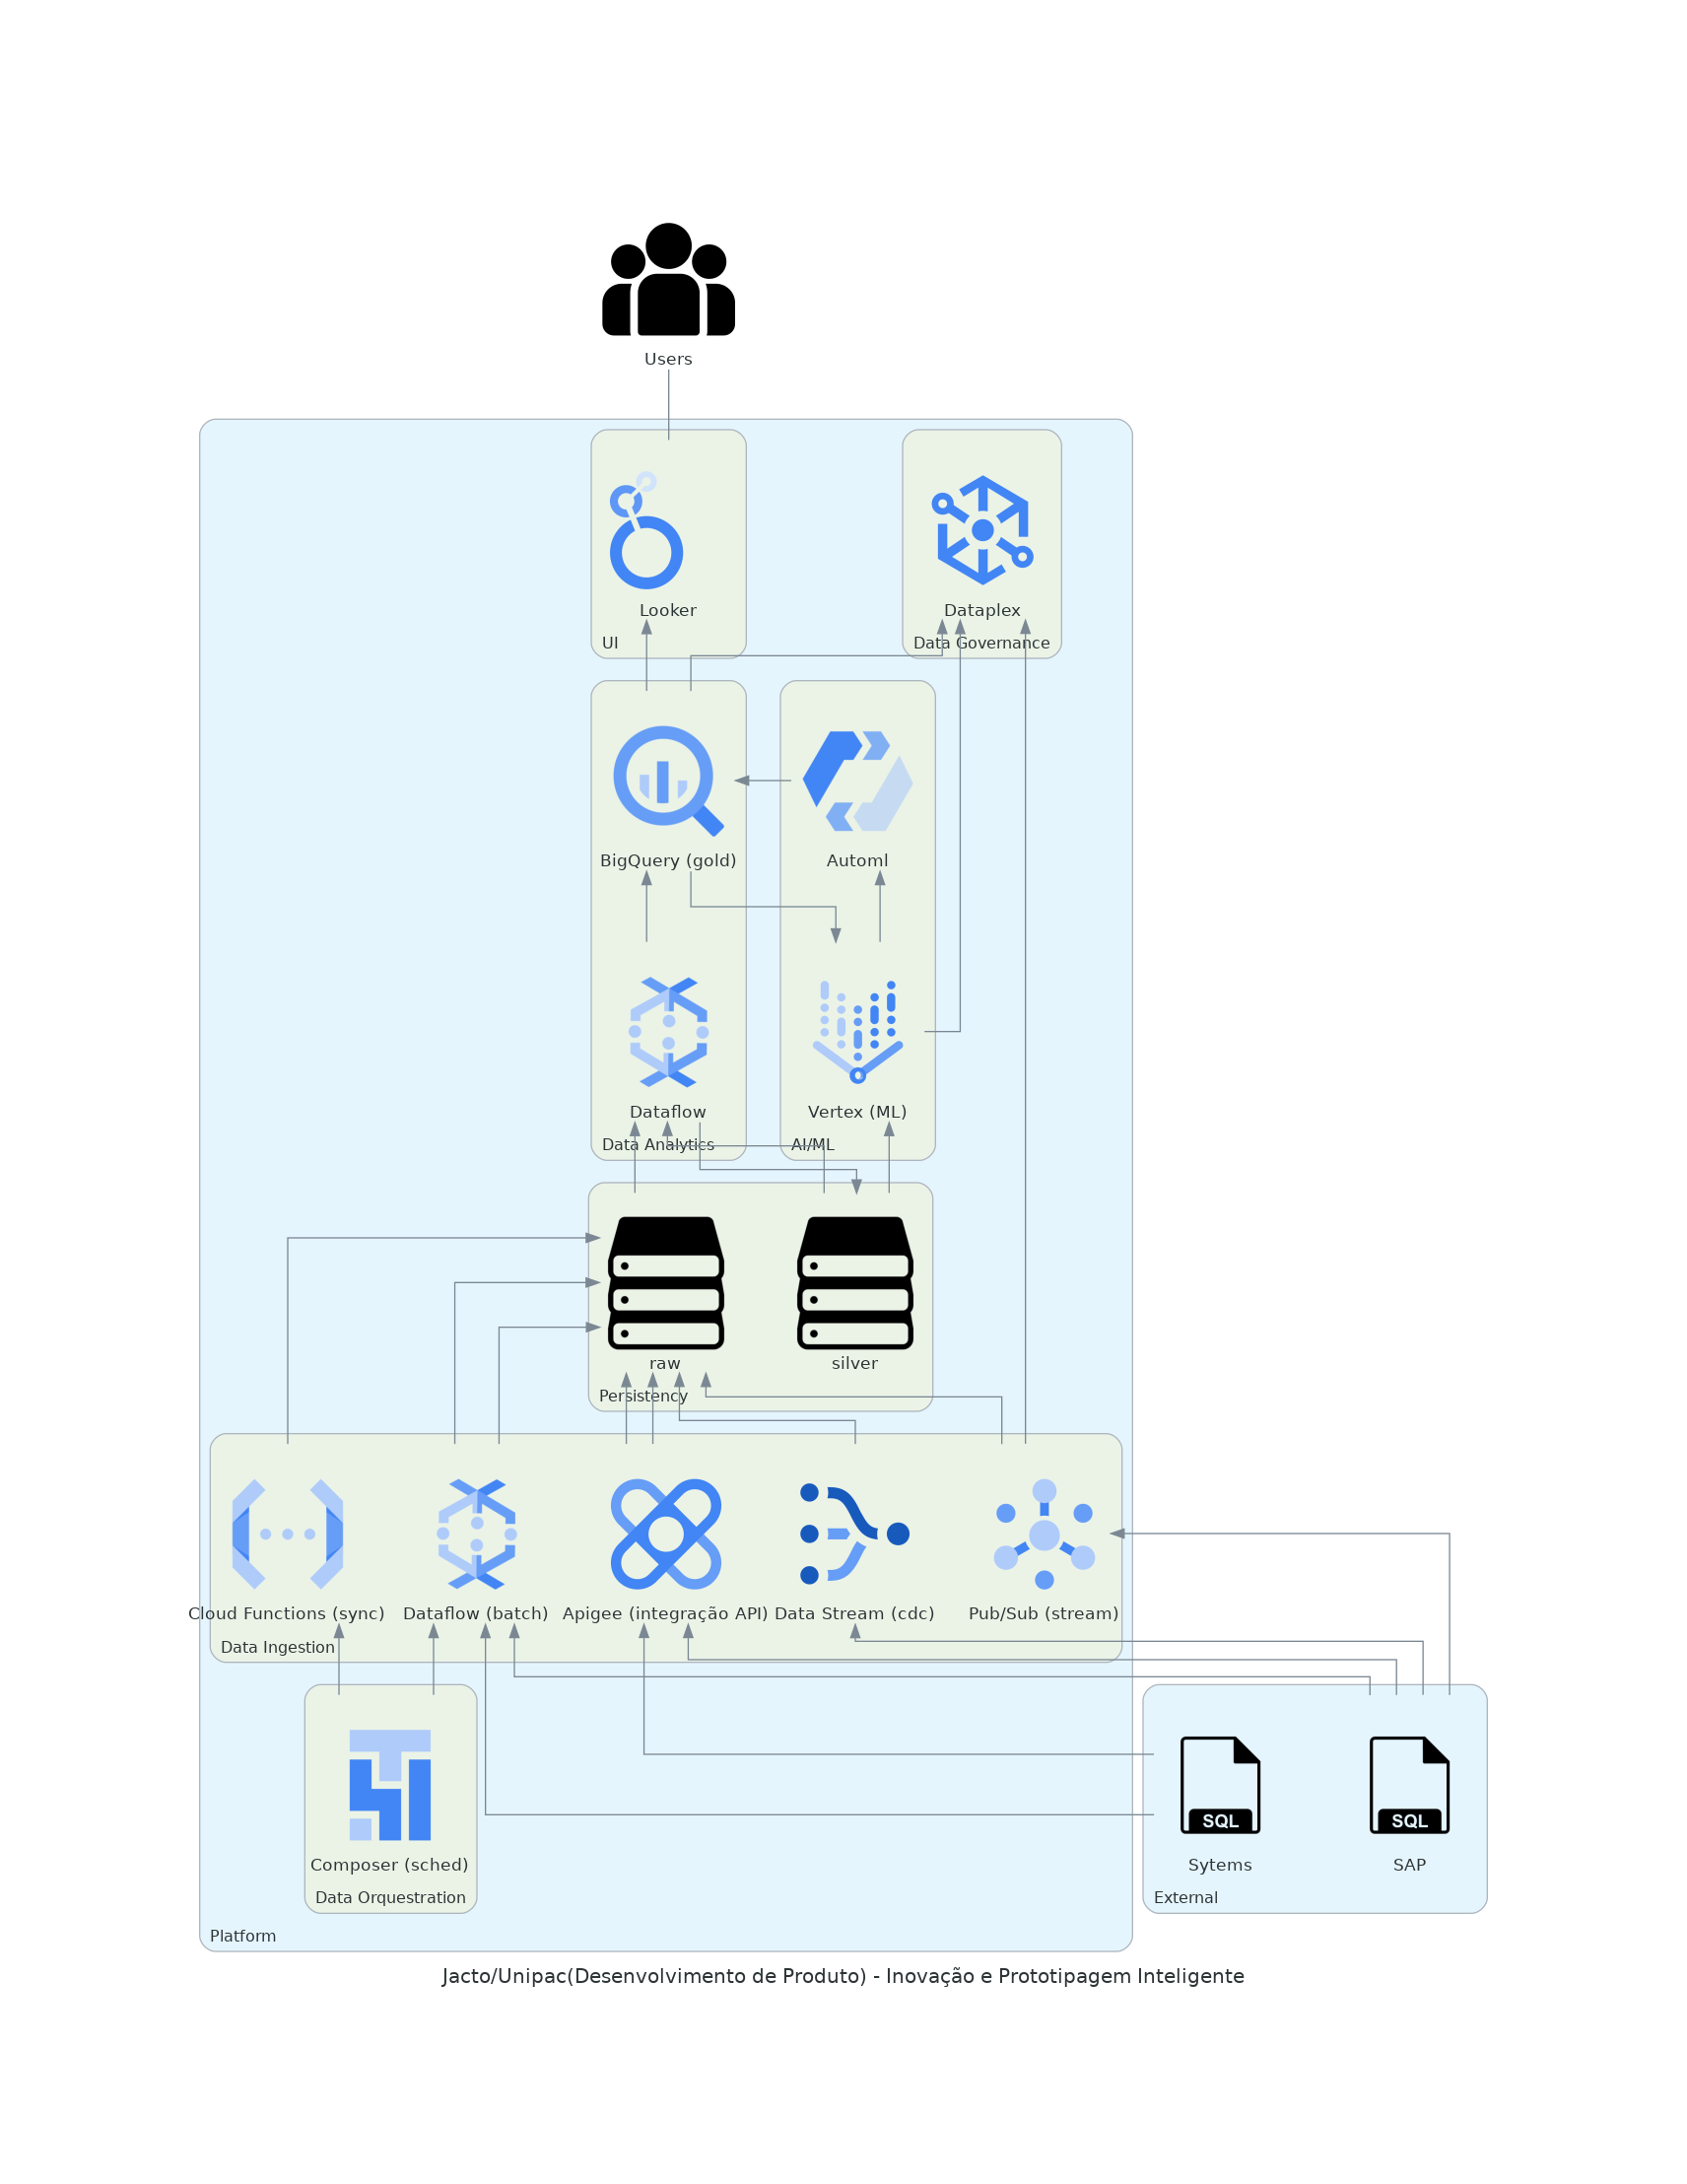

In [8]:
title = "Jacto/Unipac(Desenvolvimento de Produto) - Inovação e Prototipagem Inteligente"
filename = "diagrams/jacto-unipac-produto-proposta3"

# Criando o diagrama
with Diagram(title, 
             outformat=["png"],
             filename=filename,
             direction="BT",
             show=False) as diag:

    users = Custom("Users", "../assets/group.png")
    
    with Cluster("External"):           
        external_sap = SQL("SAP")
        external_system = SQL("Sytems")           
    
    with Cluster("Platform"):    
        
        with Cluster("Data Ingestion"):            
            
            # Orquestração com Pub/Sub
            stream = Custom("Pub/Sub (stream)", "../assets/google-cloud-icons/pubsub/pubsub.png")
            
            cdc = Custom("Data Stream (cdc)", "../assets/google-cloud-icons/datastream/datastream.png")
            
            batch = Dataflow("Dataflow (batch)")
            
            # Automação com Cloud Functions
            sync = Functions("Cloud Functions (sync)") 

            # Integração de sistemas com Apigee
            api_integration = Custom("Apigee (integração API)", "../assets/google-cloud-icons/apigee_api_platform/apigee_api_platform.png")
            
        with Cluster("Data Analytics"):
            
            dataflow = Dataflow("Dataflow")
            
            # Repositório central BigQuery
            gold = Bigquery("BigQuery (gold)")

        with Cluster("Data Orquestration"):                    
            # Orquestração de workflows com Cloud Composer
            composer = Composer("Composer (sched)")  
                        
        with Cluster("UI"):    
            
            # Dashboards com Looker
            looker = Custom("Looker", "../assets/google-cloud-icons/looker/looker.png")  

        with Cluster("Persistency"): 
            
            raw = Storage("raw")   
            silver = Storage("silver") 
            

        with Cluster("AI/ML"):
            
            vertex = Custom("Vertex (ML)", "../assets/google-cloud-icons/vertexai/vertexai.png")              
            automl = Automl("Automl")    

        with Cluster("Data Governance"):
            datacatalog = Custom("Dataplex", "../assets/google-cloud-icons/dataplex/dataplex.png")  


    composer >> [sync, batch]

    ## data ingestion
    documents >> sync >> raw

    external_sap >> stream >> raw
    external_sap >> cdc >> raw
    external_sap >> batch >> raw
    external_sap >> api_integration >> raw

    external_system >> batch >> raw
    external_system >> api_integration >> raw


    ## data transformation
    raw >> [dataflow] >> silver
    silver >> dataflow >> gold

    # machine learning
    [silver, gold] >> vertex >> automl >> gold
    
    ## ui
    gold >> looker

    [vertex, gold, stream] >> datacatalog

    looker - users

diag

### Proposta 5 - Automação e Eficiência Operacional

https://lookerstudio.google.com/reporting/635db8fd-7ec7-42fe-a182-94c068eff5b8/page/p_635o96h6kd?s=oY4QXrZjN3A

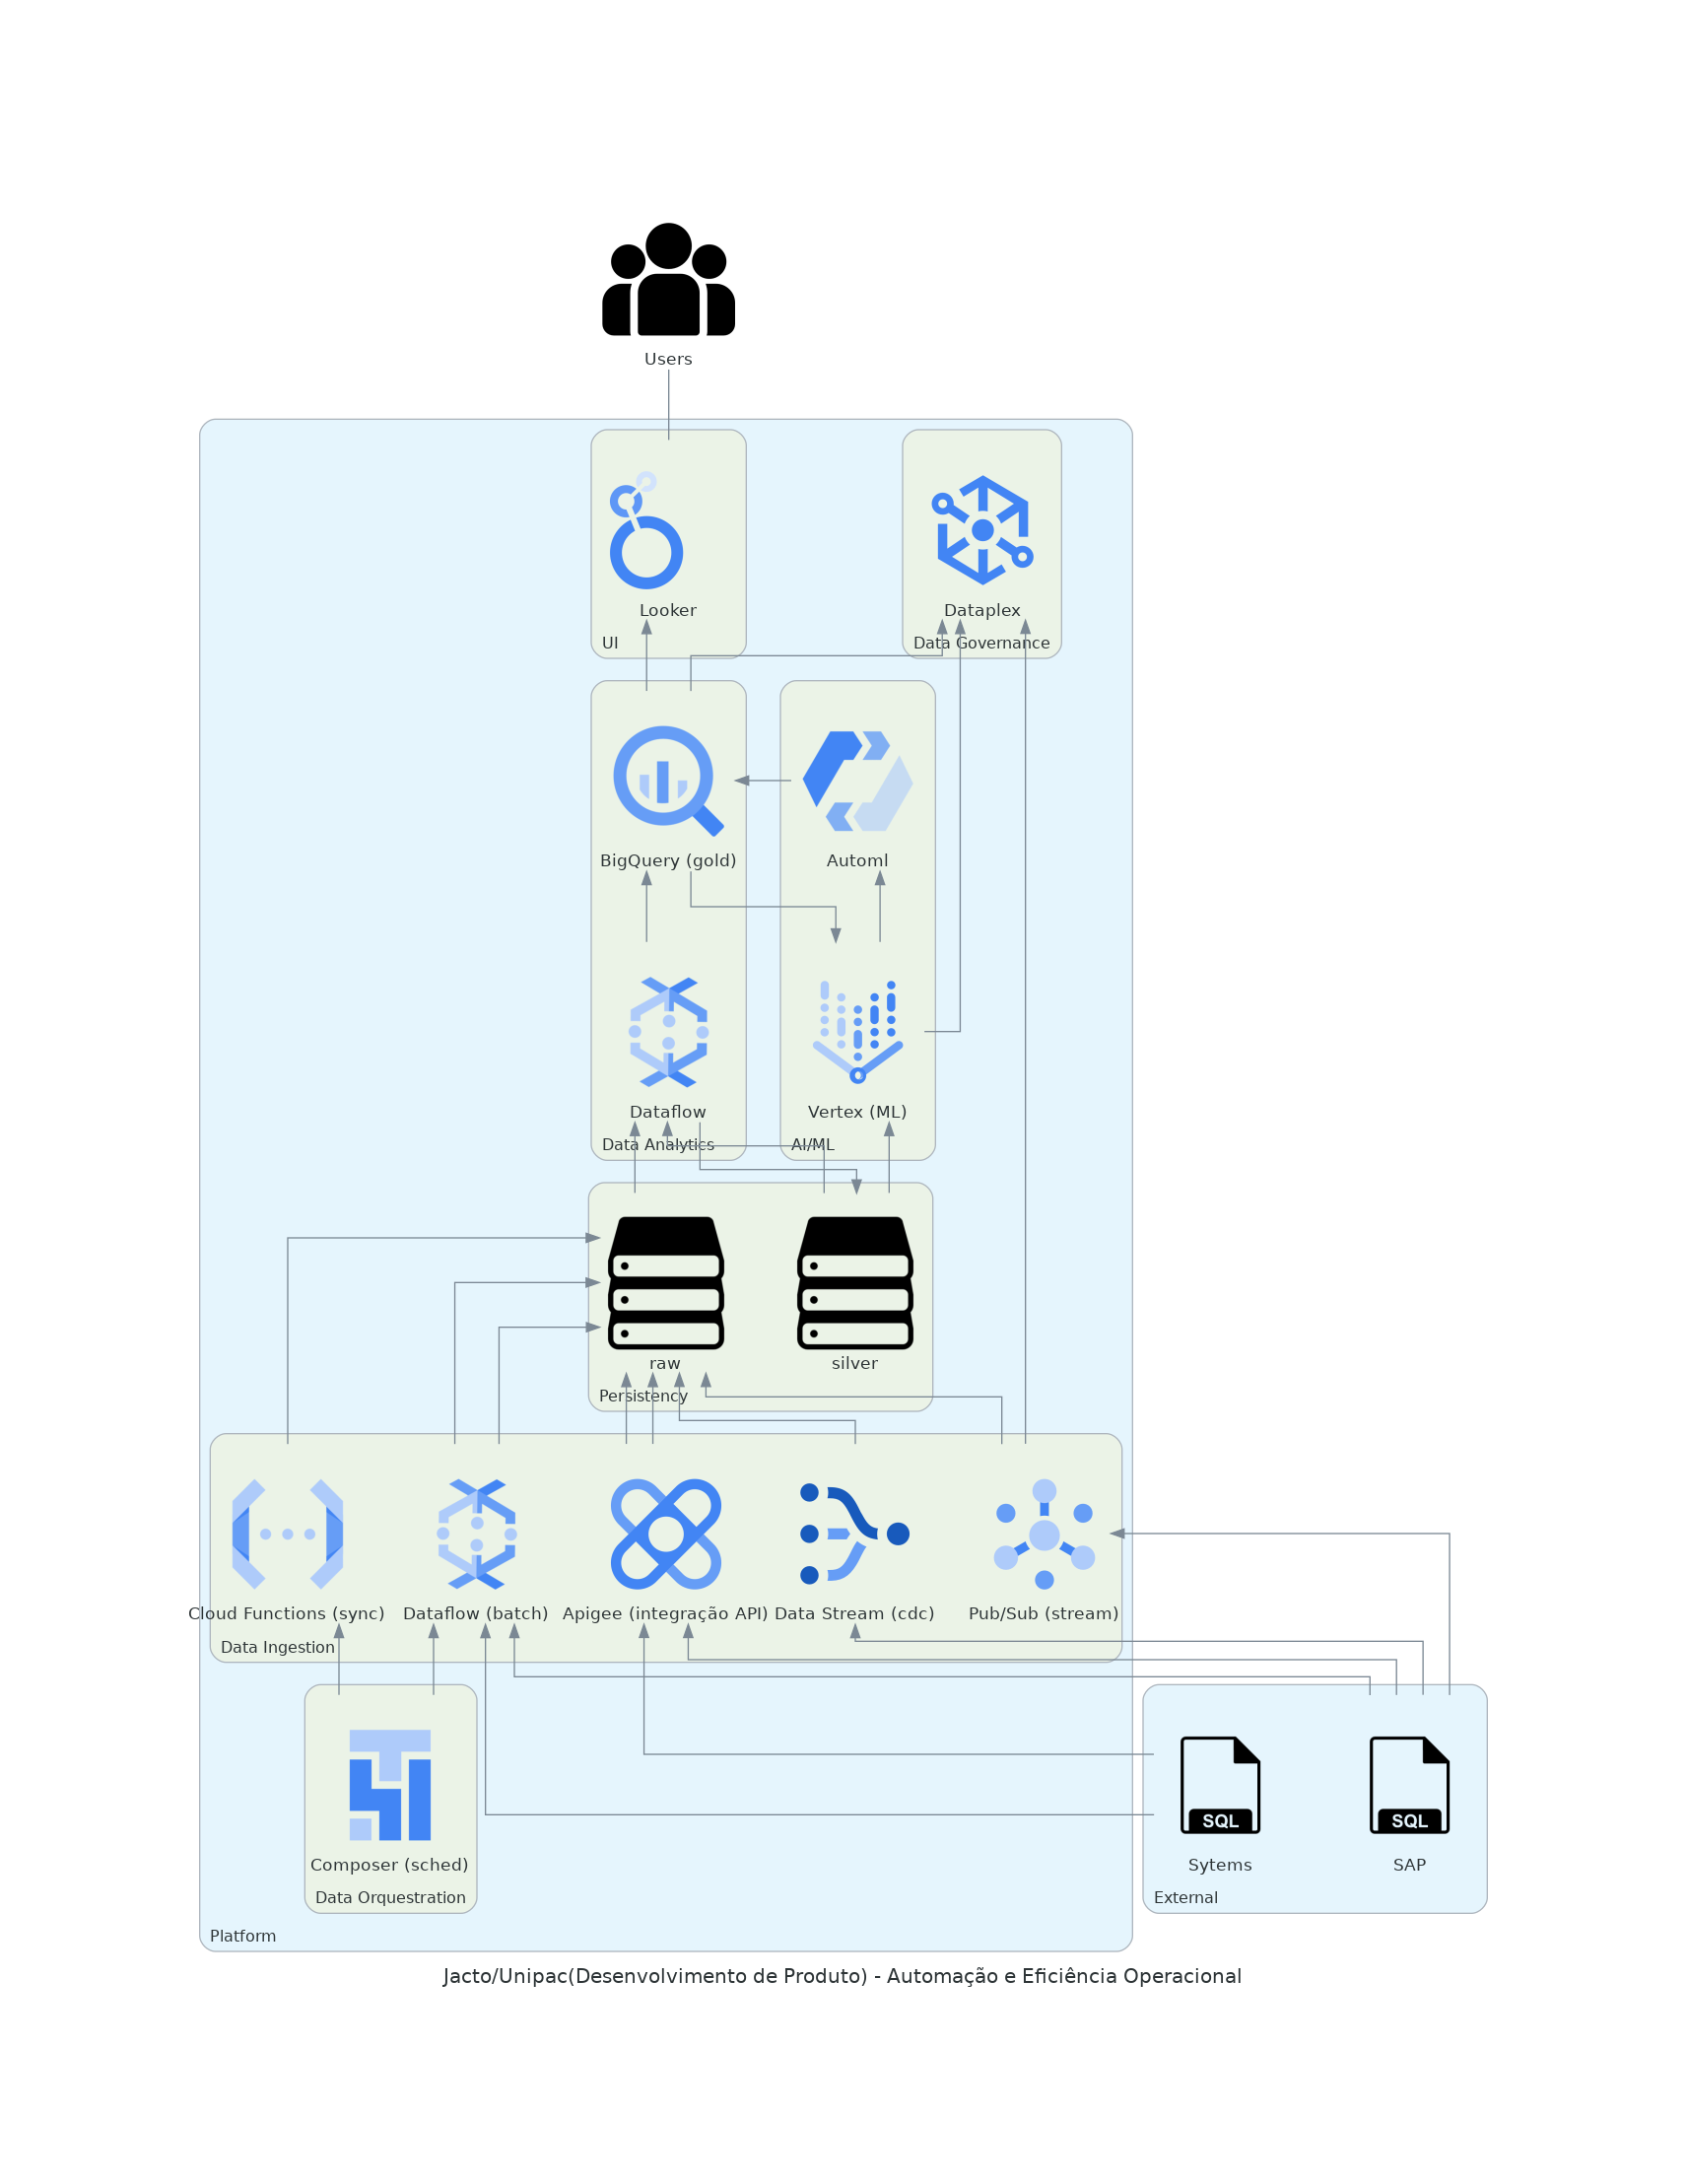

In [9]:
title = "Jacto/Unipac(Desenvolvimento de Produto) - Automação e Eficiência Operacional"
filename = "diagrams/jacto-unipac-produto-proposta5"

# Criando o diagrama
with Diagram(title, 
             outformat=["png"],
             filename=filename,
             direction="BT",
             show=False) as diag:

    users = Custom("Users", "../assets/group.png")

    with Cluster("External"):           
        external_sap = SQL("SAP")
        external_system = SQL("Sytems")           
    
    with Cluster("Platform"):    
        
        with Cluster("Data Ingestion"):            
            
            # Orquestração com Pub/Sub
            stream = Custom("Pub/Sub (stream)", "../assets/google-cloud-icons/pubsub/pubsub.png")
            
            cdc = Custom("Data Stream (cdc)", "../assets/google-cloud-icons/datastream/datastream.png")
            
            batch = Dataflow("Dataflow (batch)")
            
            # Automação com Cloud Functions
            sync = Functions("Cloud Functions (sync)") 

            # Integração de sistemas com Apigee
            api_integration = Custom("Apigee (integração API)", "../assets/google-cloud-icons/apigee_api_platform/apigee_api_platform.png")
            
        with Cluster("Data Analytics"):
            
            dataflow = Dataflow("Dataflow")
            
            # Repositório central BigQuery
            gold = Bigquery("BigQuery (gold)")

        with Cluster("Data Orquestration"):                    
            # Orquestração de workflows com Cloud Composer
            composer = Composer("Composer (sched)")  
                        
        with Cluster("UI"):    
            
            # Dashboards com Looker
            looker = Custom("Looker", "../assets/google-cloud-icons/looker/looker.png")  

        with Cluster("Persistency"): 
            
            raw = Storage("raw")   
            silver = Storage("silver") 
            

        with Cluster("AI/ML"):
            
            vertex = Custom("Vertex (ML)", "../assets/google-cloud-icons/vertexai/vertexai.png")              
            automl = Automl("Automl")    

        with Cluster("Data Governance"):
            datacatalog = Custom("Dataplex", "../assets/google-cloud-icons/dataplex/dataplex.png")  


    composer >> [sync, batch]

    ## data ingestion
    documents >> sync >> raw

    external_sap >> stream >> raw
    external_sap >> cdc >> raw
    external_sap >> batch >> raw
    external_sap >> api_integration >> raw

    external_system >> batch >> raw
    external_system >> api_integration >> raw


    ## data transformation
    raw >> [dataflow] >> silver
    silver >> dataflow >> gold

    # machine learning
    [silver, gold] >> vertex >> automl >> gold
    
    ## ui
    gold >> looker

    [vertex, gold, stream] >> datacatalog

    looker - users

diag

### Proposta 6 - Torre de Controle e Gestão de Projetos

https://lookerstudio.google.com/reporting/635db8fd-7ec7-42fe-a182-94c068eff5b8/page/p_635o96h6kd?s=oY4QXrZjN3A

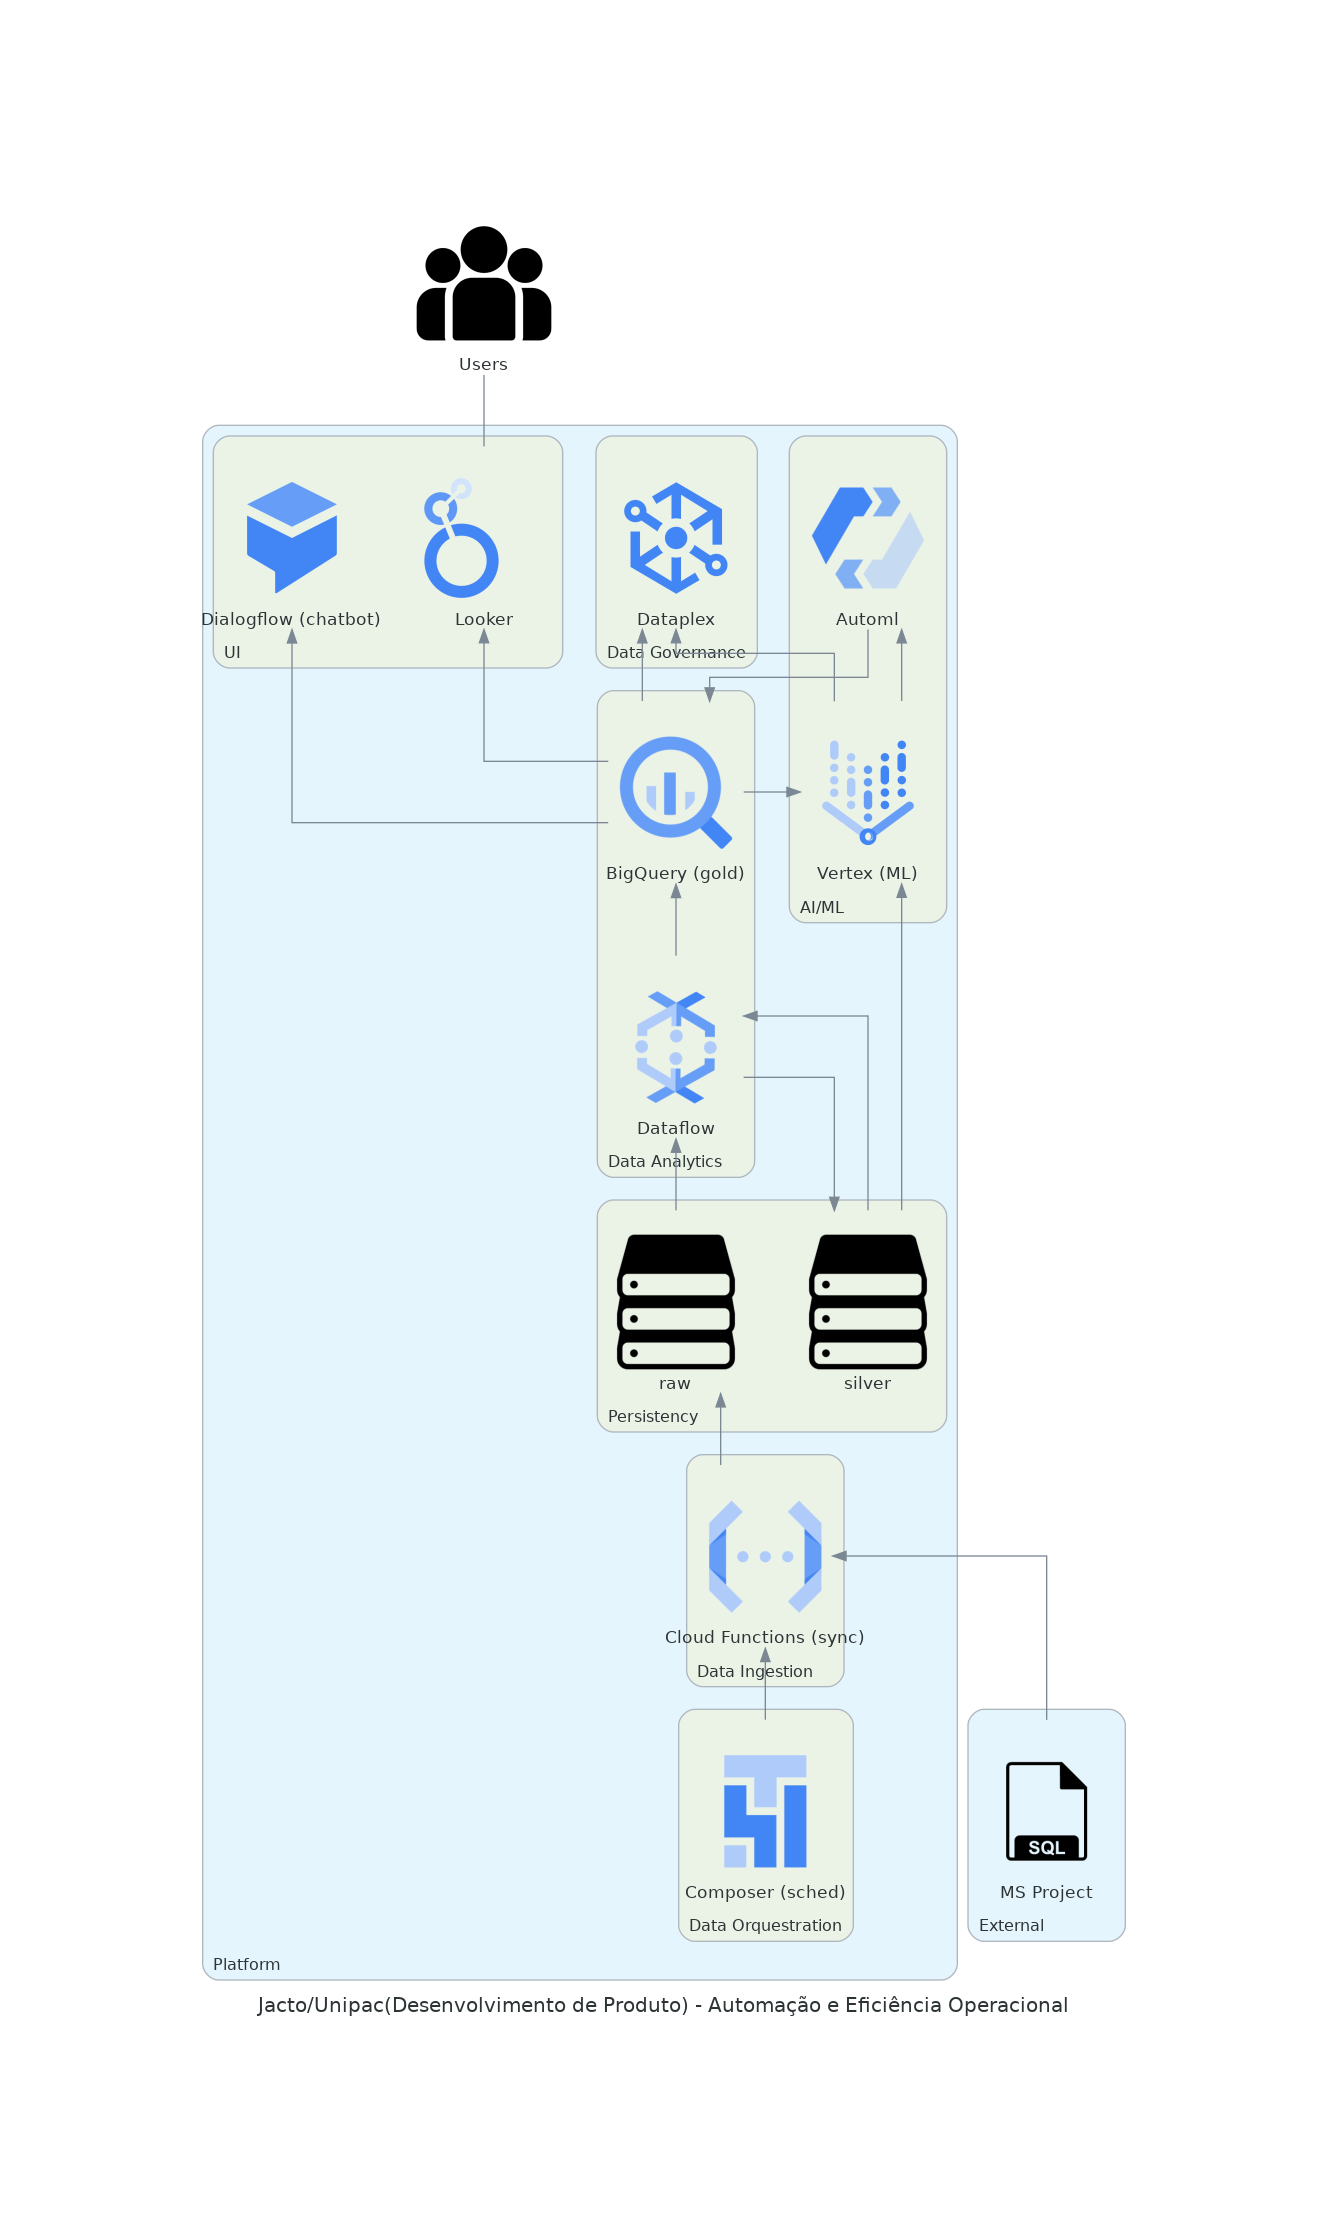

In [10]:
title = "Jacto/Unipac(Desenvolvimento de Produto) - Automação e Eficiência Operacional"
filename = "diagrams/jacto-unipac-produto-proposta6"

# Criando o diagrama
with Diagram(title, 
             outformat=["png"],
             filename=filename,
             direction="BT",
             show=False) as diag:

    users = Custom("Users", "../assets/group.png")
    
    with Cluster("External"):           
        external_system = SQL("MS Project")           
    
    with Cluster("Platform"):    
        
        with Cluster("Data Ingestion"):            
            
            # Automação com Cloud Functions
            sync = Functions("Cloud Functions (sync)") 
            
        with Cluster("Data Analytics"):
            
            dataflow = Dataflow("Dataflow")
            
            # Repositório central BigQuery
            gold = Bigquery("BigQuery (gold)")

        with Cluster("Data Orquestration"):                    
            # Orquestração de workflows com Cloud Composer
            composer = Composer("Composer (sched)")  
                        
        with Cluster("UI"):    
            
            # Dashboards com Looker
            looker = Custom("Looker", "../assets/google-cloud-icons/looker/looker.png")  
            dialogflow = Custom("Dialogflow (chatbot)", "../assets/google-cloud-icons/dialogflow/dialogflow.png")  

        with Cluster("Persistency"): 
            
            raw = Storage("raw")   
            silver = Storage("silver") 

        with Cluster("AI/ML"):
            
            vertex = Custom("Vertex (ML)", "../assets/google-cloud-icons/vertexai/vertexai.png")              
            automl = Automl("Automl")    

        with Cluster("Data Governance"):
            datacatalog = Custom("Dataplex", "../assets/google-cloud-icons/dataplex/dataplex.png")  

    composer >> [sync]

    ## data ingestion
    external_system >> sync >> raw


    ## data transformation
    raw >> [dataflow] >> silver
    silver >> dataflow >> gold

    # machine learning
    [silver, gold] >> vertex >> automl >> gold
    
    ## ui
    gold >> looker
    gold >> dialogflow
    
    [vertex, gold, stream] >> datacatalog

    looker - users

diag